# SONM active deal analyzer

## This notebook is to analyze active deals on the SONM platform in real-time.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import datetime


In [4]:
pd.Timestamp.now()

Timestamp('2018-10-02 01:16:33.214696')

In [5]:
from matplotlib import pyplot as plt

### ipython magic to plot in a notebook

In [6]:
%matplotlib inline

### SONM's DWH spits out API information of active deals.  Using Jupyter's magic to run BASH command to save the API data to livedeal.txt

In [7]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":1}' > livedeal.txt

In [8]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":2}' > history.txt

In [9]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":0}' > all.txt

### Open the saved text in Jupyter

In [10]:
f = open('all.txt','r')

### Convert opened file to Pandas dataframe.

In [11]:
k = f.readlines()

In [12]:
r = k[0].split(',')

In [13]:
headposition = []
i = 0
for item in r:
    if 'deal' in item:

        headposition.append(i)
    i = i+1

In [14]:
#modified_list29 = []
#modified_list30 = []
#modified_list31 = []
test_list=[]
for i in range(len(headposition)):
    if headposition[i]>0:
        #print(int(headposition[i-1])-int(headposition[i]))
        # Selecting only spot deals
        #print(int(headposition[i-1])-int(headposition[i]))
        content = r[headposition[i-1] : headposition[i]]
        #print(content)
        for item in content:
            if 'duration' in item:
                #print("yes")
                #print(content)
                content.remove(item)
                #print(content)
            #else:
                #print("no")
        test_list.append(content)
        #if (int(headposition[i-1])-int(headposition[i])) == -30:
        #print(r[headposition[i-1] : headposition[i]])
        #print(int([headposition[i-1]])-int([headposition[i]]))
        #    modified_list30.append(r[headposition[i-1] : headposition[i]])
        #elif (int(headposition[i-1])-int(headposition[i])) == -29:
        #    modified_list29.append(r[headposition[i-1] : headposition[i]])
        #elif (int(headposition[i-1])-int(headposition[i])) == -31:
        #    modified_list29.append(r[headposition[i-1] : headposition[i]])
            

In [15]:
df = pd.DataFrame(test_list)

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,"""endTime"":""2018-07-10T22:26:58Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""14035301199252912""","""lastBillTS"":""2018-07-10T22:26:58Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,"""endTime"":""2018-07-10T23:01:22Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""0""","""lastBillTS"":""2018-07-10T23:01:22Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""endTime"":""2018-06-30T09:15:10Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""220442164649124220""","""lastBillTS"":""2018-06-30T09:15:10Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,"""endTime"":""2018-07-17T17:31:37Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""1318266378199899""","""lastBillTS"":""2018-07-17T17:31:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,"""endTime"":""2018-07-30T14:07:20Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""454377175559014483""","""lastBillTS"":""2018-07-30T14:07:20Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None


In [17]:
df.shape

(14129, 31)

In [18]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
14124,"{""deal"":{""id"":""14125""","""benchmarks"":{""values"":[1731",1144,2,64000001,150000000,1000000,1000000,0,0,...,"""endTime"":""2018-10-02T01:05:51Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""783176058655224""","""lastBillTS"":""2018-10-02T01:05:51Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None
14125,"{""deal"":{""id"":""14127""","""benchmarks"":{""values"":[639",1140,2,64000000,150000000,1000000,1000001,0,0,...,"""endTime"":""2018-10-02T01:10:30Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""800278288163096""","""lastBillTS"":""2018-10-02T01:10:30Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None
14126,"{""deal"":{""id"":""14128""","""benchmarks"":{""values"":[1017",1144,2,64000001,150000000,1000000,1000000,0,0,...,"""endTime"":""2018-10-02T01:14:00Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""1129810771144639""","""lastBillTS"":""2018-10-02T01:14:00Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None
14127,"{""deal"":{""id"":""14126""","""benchmarks"":{""values"":[784",1140,2,64000000,150000000,1000000,1000001,0,0,...,"""endTime"":""2018-10-02T01:10:30Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""995640340861734""","""lastBillTS"":""2018-10-02T01:10:30Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None
14128,"{""deal"":{""id"":""14130""","""benchmarks"":{""values"":[1423",1140,2,64000000,150000000,1000000,1000001,0,0,...,"""endTime"":""1970-01-01T00:00:00Z""","""status"":1","""blockedBalance"":""15710828215036176""","""totalPayout"":""0""","""lastBillTS"":""2018-10-02T01:11:42Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None


## Data Cleaning

### The 14 column contains consumer ID.  First clean this colum.

In [19]:
df[15]

0        "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
1        "consumerID":"0xbaCcB540c12bF3baaCD77beB161C31...
2        "consumerID":"0x517648Ec2E592969Ec344642034F07...
3        "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
4        "consumerID":"0x417c92FbD944b125A578848DE44a4F...
5        "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
6        "consumerID":"0x417c92FbD944b125A578848DE44a4F...
7        "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
8        "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
9        "consumerID":"0x417c92FbD944b125A578848DE44a4F...
10       "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
11       "consumerID":"0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A...
12       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
13       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
14       "consumerID":"0xcB9Bb24E33A4F0f482f7060e6D4a4C...
15       "consumerID":"0x417c92FbD944b125A578848DE44a4F...
16       "consumerID":"0x417c92FbD944b125A578848DE44a4F.

### Make a little funtion to trim unnecessary charactors

In [20]:
def Supplier_ID_conversion(content):
    return content[14:-1]

###  And applyt to pandas data frame.  New column called consumer_ID is generated.

In [21]:
df['consumer_ID'] = df[15].apply(Supplier_ID_conversion)

In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,consumer_ID
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""14035301199252912""","""lastBillTS"":""2018-07-10T22:26:58Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""0""","""lastBillTS"":""2018-07-10T23:01:22Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0xbaCcB540c12bF3baaCD77beB161C31700022ED40
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""220442164649124220""","""lastBillTS"":""2018-06-30T09:15:10Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""1318266378199899""","""lastBillTS"":""2018-07-17T17:31:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""454377175559014483""","""lastBillTS"":""2018-07-30T14:07:20Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911


## supplier

###  Same trick for the supplier ID.  The 13 column contains supplier ID information.  Clean with the same function.

In [23]:
df[14]

0        "supplierID":"0xE0babb8aB2cE8845B68e32a87d3352...
1        "supplierID":"0x2E0E58635F11b1F35556F1fAe30E17...
2        "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
3        "supplierID":"0x26200241593722FA17DE5722Ed66d8...
4        "supplierID":"0x26200241593722FA17DE5722Ed66d8...
5        "supplierID":"0x26200241593722FA17DE5722Ed66d8...
6        "supplierID":"0x1E575FB7dD8b28CEcAD9065A7aFD1a...
7        "supplierID":"0xEBB9099c31EF1C72a2E597cD4c0205...
8        "supplierID":"0x2f90D7A115cFAf62ea05eDF0E5C7E9...
9        "supplierID":"0x5C58ed5549db58d53816557Abf62F0...
10       "supplierID":"0xC1bf17F560FA5BF79aF72B4314d147...
11       "supplierID":"0x21072B707303F56F019df7BBaa1a6e...
12       "supplierID":"0x26200241593722FA17DE5722Ed66d8...
13       "supplierID":"0xC1bf17F560FA5BF79aF72B4314d147...
14       "supplierID":"0xFEe641fD3e5288E39238887dFa2695...
15       "supplierID":"0x26200241593722FA17DE5722Ed66d8...
16       "supplierID":"0x4FC67349467228BF3e57A8eaAf135D.

In [24]:
df['supplier_ID'] = df[14].apply(Supplier_ID_conversion)

### Price

### Price value is shown as USD/s, so conver it to USD/h

In [25]:
unit = 10.0**18.0

4830442500000/unit * 60 *60

In [26]:
def Price_conversion(content):
    if 'price' in content:
        return float(content[9:-1])/unit * 60 *60
    if 'duration' in content:
        return float(content[11:-1])/unit * 60 * 60

In [27]:
df['price_USD/h'] = df[19].apply(Price_conversion)

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,"""totalPayout"":""14035301199252912""","""lastBillTS"":""2018-07-10T22:26:58Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.037976
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,"""totalPayout"":""0""","""lastBillTS"":""2018-07-10T23:01:22Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0xbaCcB540c12bF3baaCD77beB161C31700022ED40,0x2E0E58635F11b1F35556F1fAe30E17348e0967c6,0.000000
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""totalPayout"":""220442164649124220""","""lastBillTS"":""2018-06-30T09:15:10Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,"""totalPayout"":""1318266378199899""","""lastBillTS"":""2018-07-17T17:31:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.019923
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,"""totalPayout"":""454377175559014483""","""lastBillTS"":""2018-07-30T14:07:20Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.292659


###  ETH has rate

### The 10 column contains Ethash value.  Clean and convert to Mh/s.

In [29]:
df[10]

0         35642000
1         29779000
2         79806000
3         26625000
4        199600000
5         59887000
6         21959000
7         13125000
8         26543000
9        159800000
10        59126000
11               0
12        53259000
13        59126000
14               0
15       199602000
16        57753000
17        29779000
18        19934000
19       172031000
20               0
21        27518000
22        27459000
23        26670000
24        12386000
25               0
26        29779000
27        27470000
28        27470000
29       115430000
           ...    
14099            0
14100            0
14101            0
14102            0
14103            0
14104            0
14105            0
14106            0
14107            0
14108    194346000
14109            0
14110            0
14111            0
14112            0
14113            0
14114            0
14115            0
14116            0
14117            0
14118            0
14119            0
14120       

In [30]:
float(df[10][0])/1000000

35.642

In [31]:
def Ethash_conversion(content):
    return float(content)/1000000

In [32]:
Ethash_conversion(df[10][0])

35.642

In [33]:
df['Ethash'] = df[10].apply(Ethash_conversion)

In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,"""lastBillTS"":""2018-07-10T22:26:58Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.037976,35.642
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,"""lastBillTS"":""2018-07-10T23:01:22Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0xbaCcB540c12bF3baaCD77beB161C31700022ED40,0x2E0E58635F11b1F35556F1fAe30E17348e0967c6,0.000000,29.779
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""lastBillTS"":""2018-06-30T09:15:10Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,"""lastBillTS"":""2018-07-17T17:31:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.019923,26.625
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,"""lastBillTS"":""2018-07-30T14:07:20Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.292659,199.600


# deal ID


In [35]:
df[0]

0        {"deals":[{"deal":{"id":"1178"
1                  {"deal":{"id":"1192"
2                     {"deal":{"id":"1"
3                  {"deal":{"id":"1663"
4                  {"deal":{"id":"2555"
5                  {"deal":{"id":"1177"
6                  {"deal":{"id":"6035"
7                     {"deal":{"id":"4"
8                     {"deal":{"id":"3"
9                  {"deal":{"id":"3604"
10                 {"deal":{"id":"1993"
11                 {"deal":{"id":"9835"
12                 {"deal":{"id":"1665"
13                 {"deal":{"id":"1863"
14                 {"deal":{"id":"2279"
15                 {"deal":{"id":"2334"
16                 {"deal":{"id":"5999"
17                 {"deal":{"id":"1195"
18                    {"deal":{"id":"7"
19                 {"deal":{"id":"6000"
20                 {"deal":{"id":"2448"
21                    {"deal":{"id":"9"
22                    {"deal":{"id":"8"
23                   {"deal":{"id":"10"
24                 {"deal":{"id":"5996"


In [36]:
df[0][1]

'{"deal":{"id":"1192"'

In [37]:
df[0][1].index('"')

1

In [38]:
df[0][1].find('"')

1

In [39]:
df[0][1][:-1].rfind('"')

14

In [40]:
x = 1

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'1192'

In [41]:
x = 0

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'1178'

In [42]:
x = 5258

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'4411'

In [43]:
def convert_deal_ID(content):
    return int(content[content[:-1].rfind('"')+1:-1])

In [44]:
convert_deal_ID(df[0][1])

1192

In [45]:
df['deal_ID'] = df[0].apply(convert_deal_ID)

In [46]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.037976,35.642,1178
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,"""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0xbaCcB540c12bF3baaCD77beB161C31700022ED40,0x2E0E58635F11b1F35556F1fAe30E17348e0967c6,0.000000,29.779,1192
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,1
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.019923,26.625,1663
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.292659,199.600,2555


# master node

In [47]:
df[16]

0        "masterID":"0x24ceb5Ec6D7C58bD519974A6Ba76F50c...
1        "masterID":"0x77D216e0D9EDb9e99AC1c34152C52e7d...
2        "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
3        "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
4        "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
5        "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
6        "masterID":"0xAAA932d77935EE3d8E0Ba1d464CFDA4E...
7        "masterID":"0xd0ecfF77c5B50BAB4D865CB1254A14dd...
8        "masterID":"0x517648Ec2E592969Ec344642034F079c...
9        "masterID":"0x12d5e94d46B65df250B43d426777462e...
10       "masterID":"0x517648Ec2E592969Ec344642034F079c...
11       "masterID":"0xC223747926db5164D6Dc466CF5168652...
12       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
13       "masterID":"0x517648Ec2E592969Ec344642034F079c...
14       "masterID":"0x99e4bfC6Eec8542f5fc7e8017bfAeC35...
15       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
16       "masterID":"0xE0E924b23852b7a4cEA3183dBaC056af.

In [48]:
def Master_ID_conversion(content):
    return content[12:-1]

In [49]:
df['master_ID'] =  df[16].apply(Master_ID_conversion)

In [50]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.037976,35.642,1178,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0xbaCcB540c12bF3baaCD77beB161C31700022ED40,0x2E0E58635F11b1F35556F1fAe30E17348e0967c6,0.000000,29.779,1192,0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.019923,26.625,1663,0xedB7Ae4B946Cf249349974A02e354B5FBC577798
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798


# time stamp

# start time

In [51]:
df[20]

0        "startTime":"2018-07-10T22:24:13Z"
1        "startTime":"2018-07-10T22:51:19Z"
2        "startTime":"2018-06-30T08:53:49Z"
3        "startTime":"2018-07-17T17:31:07Z"
4        "startTime":"2018-07-30T13:56:01Z"
5        "startTime":"2018-07-10T22:23:31Z"
6        "startTime":"2018-09-05T09:32:32Z"
7        "startTime":"2018-06-30T12:31:01Z"
8        "startTime":"2018-06-30T12:23:37Z"
9        "startTime":"2018-08-15T11:30:58Z"
10       "startTime":"2018-07-21T13:18:07Z"
11       "startTime":"2018-09-24T05:44:10Z"
12       "startTime":"2018-07-17T17:33:07Z"
13       "startTime":"2018-07-19T17:13:25Z"
14       "startTime":"2018-07-26T11:28:19Z"
15       "startTime":"2018-07-27T09:49:28Z"
16       "startTime":"2018-09-05T04:57:47Z"
17       "startTime":"2018-07-10T23:19:34Z"
18       "startTime":"2018-06-30T12:48:37Z"
19       "startTime":"2018-09-05T04:57:56Z"
20       "startTime":"2018-07-28T16:49:49Z"
21       "startTime":"2018-06-30T13:07:55Z"
22       "startTime":"2018-06-30

In [52]:
df[20][0]

'"startTime":"2018-07-10T22:24:13Z"'

In [53]:
df[20][0][12:]

'"2018-07-10T22:24:13Z"'

In [54]:
pd.to_datetime("2018-07-24T13:37:46Z")

Timestamp('2018-07-24 13:37:46')

In [55]:
pd.to_datetime(df[20][0][13:-1])

Timestamp('2018-07-10 22:24:13')

In [56]:
def convert_starttime(content):
    if "price" in content:
        return pd.Timestamp.now()
        #print(content[13:-1])
    else:
        return pd.to_datetime(content[13:-1])

In [57]:
#df.to_html('intermediate.html')

In [58]:
df['starttime']= df[20].apply(convert_starttime)

In [59]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,"""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.037976,35.642,1178,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-10 22:24:13
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,"""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0xbaCcB540c12bF3baaCD77beB161C31700022ED40,0x2E0E58635F11b1F35556F1fAe30E17348e0967c6,0.000000,29.779,1192,0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117,2018-07-10 22:51:19
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,"""bidIdentityLevel"":1","""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.019923,26.625,1663,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-17 17:31:07
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,"""bidIdentityLevel"":1}",None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01


# end time

In [60]:
df[21]

0        "endTime":"2018-07-10T22:26:58Z"
1        "endTime":"2018-07-10T23:01:22Z"
2        "endTime":"2018-06-30T09:15:10Z"
3        "endTime":"2018-07-17T17:31:37Z"
4        "endTime":"2018-07-30T14:07:20Z"
5        "endTime":"2018-07-10T22:27:40Z"
6        "endTime":"2018-09-05T10:21:02Z"
7        "endTime":"2018-06-30T12:55:46Z"
8        "endTime":"2018-06-30T13:49:10Z"
9        "endTime":"2018-08-15T14:12:19Z"
10       "endTime":"2018-07-21T21:37:43Z"
11       "endTime":"2018-09-24T05:50:25Z"
12       "endTime":"2018-07-17T18:04:10Z"
13       "endTime":"2018-07-19T20:26:04Z"
14       "endTime":"2018-07-26T12:43:22Z"
15       "endTime":"2018-07-27T09:50:07Z"
16       "endTime":"2018-09-05T10:23:02Z"
17       "endTime":"2018-07-10T23:24:31Z"
18       "endTime":"2018-06-30T13:13:01Z"
19       "endTime":"2018-09-05T10:23:23Z"
20       "endTime":"2018-07-28T16:52:52Z"
21       "endTime":"2018-06-30T13:12:55Z"
22       "endTime":"2018-06-30T13:17:22Z"
23       "endTime":"2018-06-30T14:

In [61]:
def convert_endtime(content):
    if content == '"endTime":"1970-01-01T00:00:00Z"':
        return pd.Timestamp.now()
    elif content == '1970-01-01':
        return pd.Timestamp.now()
    elif "startTime" in content:
        return pd.Timestamp.now()
    else:
        print(content[11:-1])
        return pd.to_datetime(content[11:-1])

In [62]:
df['endtime']= df[21].apply(convert_endtime)

2018-07-10T22:26:58Z
2018-07-10T23:01:22Z
2018-06-30T09:15:10Z
2018-07-17T17:31:37Z
2018-07-30T14:07:20Z
2018-07-10T22:27:40Z
2018-09-05T10:21:02Z
2018-06-30T12:55:46Z
2018-06-30T13:49:10Z
2018-08-15T14:12:19Z
2018-07-21T21:37:43Z
2018-09-24T05:50:25Z
2018-07-17T18:04:10Z
2018-07-19T20:26:04Z
2018-07-26T12:43:22Z
2018-07-27T09:50:07Z
2018-09-05T10:23:02Z
2018-07-10T23:24:31Z
2018-06-30T13:13:01Z
2018-09-05T10:23:23Z
2018-07-28T16:52:52Z
2018-06-30T13:12:55Z
2018-06-30T13:17:22Z
2018-06-30T14:30:13Z
2018-09-05T10:23:20Z
2018-07-25T20:12:28Z
2018-07-10T23:17:28Z
2018-06-30T13:27:34Z
2018-06-30T14:07:16Z
2018-09-05T10:23:11Z
2018-08-17T13:37:29Z
2018-06-30T14:18:01Z
2018-06-30T15:23:31Z
2018-06-30T16:08:52Z
2018-07-10T22:50:28Z
2018-06-30T14:22:04Z
2018-07-27T09:53:07Z
2018-06-30T14:35:13Z
2018-06-30T16:44:16Z
2018-07-27T09:51:37Z
2018-07-26T12:46:43Z
2018-07-11T02:24:43Z
2018-06-30T17:14:16Z
2018-07-01T00:45:31Z
2018-07-30T14:18:44Z
2018-08-01T10:32:33Z
2018-09-21T08:51:14Z
2018-06-30T18

2018-07-03T17:33:28Z
2018-08-15T17:46:40Z
2018-08-17T14:55:44Z
2018-07-11T17:49:46Z
2018-07-03T18:16:46Z
2018-07-03T19:44:04Z
2018-08-01T11:00:51Z
2018-08-01T11:02:51Z
2018-07-11T17:49:49Z
2018-07-03T20:18:46Z
2018-07-20T20:44:43Z
2018-08-15T17:48:19Z
2018-07-11T17:49:52Z
2018-07-03T17:46:52Z
2018-07-03T17:50:34Z
2018-07-03T18:38:01Z
2018-07-11T18:38:16Z
2018-07-03T19:22:34Z
2018-07-03T19:49:58Z
2018-07-03T20:16:28Z
2018-07-24T10:27:49Z
2018-08-15T17:46:19Z
2018-07-11T18:38:19Z
2018-07-03T19:44:37Z
2018-07-20T20:37:13Z
2018-07-03T19:43:49Z
2018-08-15T17:46:31Z
2018-07-03T19:43:31Z
2018-07-11T18:38:25Z
2018-07-20T20:34:52Z
2018-07-23T16:03:49Z
2018-07-27T10:51:19Z
2018-07-11T17:45:01Z
2018-08-15T17:45:49Z
2018-07-20T20:44:22Z
2018-07-23T16:11:10Z
2018-07-27T10:49:49Z
2018-07-11T17:49:40Z
2018-07-03T20:41:01Z
2018-07-03T20:33:58Z
2018-07-03T20:07:22Z
2018-08-01T11:00:51Z
2018-07-28T12:47:16Z
2018-07-11T18:43:10Z
2018-07-03T21:04:07Z
2018-07-11T18:54:01Z
2018-08-01T11:02:51Z
2018-07-03T21

2018-07-06T13:34:04Z
2018-07-06T13:29:13Z
2018-08-01T11:25:06Z
2018-07-12T13:52:22Z
2018-07-06T15:30:07Z
2018-07-06T18:19:49Z
2018-07-21T08:25:28Z
2018-07-09T10:14:34Z
2018-07-27T11:29:37Z
2018-09-05T11:19:23Z
2018-07-06T15:09:31Z
2018-07-06T16:55:19Z
2018-09-05T11:19:32Z
2018-07-12T12:25:01Z
2018-07-06T15:31:10Z
2018-07-06T15:33:07Z
2018-07-21T07:19:04Z
2018-07-27T09:23:13Z
2018-09-05T11:21:59Z
2018-08-15T18:25:22Z
2018-07-12T18:49:19Z
2018-07-21T07:12:01Z
2018-07-27T09:24:34Z
2018-07-12T18:45:49Z
2018-07-06T18:16:52Z
2018-07-06T17:26:01Z
2018-07-21T09:18:43Z
2018-09-13T03:08:41Z
2018-07-27T09:25:46Z
2018-07-06T18:28:07Z
2018-07-12T18:51:43Z
2018-07-21T07:45:49Z
2018-07-06T20:30:16Z
2018-07-12T16:19:16Z
2018-07-18T18:02:13Z
2018-08-25T07:10:17Z
2018-07-06T20:35:13Z
2018-07-27T09:27:07Z
2018-09-13T03:08:44Z
2018-07-06T20:20:25Z
2018-07-06T20:27:10Z
2018-07-18T18:47:13Z
2018-07-27T11:32:40Z
2018-08-24T04:06:19Z
2018-07-12T16:46:13Z
2018-07-06T23:18:01Z
2018-07-21T07:47:19Z
2018-07-27T11

2018-07-09T21:09:55Z
2018-07-09T20:55:01Z
2018-07-09T20:50:22Z
2018-07-17T12:33:31Z
2018-07-09T20:38:04Z
2018-07-09T20:37:10Z
2018-07-09T20:37:07Z
2018-07-24T07:55:49Z
2018-09-24T13:59:28Z
2018-07-17T12:23:28Z
2018-07-09T20:55:04Z
2018-07-09T21:08:37Z
2018-07-09T21:14:40Z
2018-07-29T16:05:25Z
2018-07-09T21:08:40Z
2018-07-09T20:43:07Z
2018-07-17T12:36:19Z
2018-09-22T17:40:44Z
2018-07-29T16:05:04Z
2018-09-26T12:41:45Z
2018-08-17T16:31:35Z
2018-08-19T14:55:26Z
2018-08-24T20:57:25Z
2018-07-29T16:04:22Z
2018-07-17T12:32:49Z
2018-07-09T21:37:01Z
2018-08-24T06:35:22Z
2018-07-19T13:56:49Z
2018-07-29T16:04:43Z
2018-07-30T07:26:01Z
2018-07-30T07:28:55Z
2018-07-30T07:33:25Z
2018-08-01T07:36:21Z
2018-08-01T11:53:27Z
2018-07-17T12:43:25Z
2018-07-19T11:22:13Z
2018-07-10T06:10:49Z
2018-07-21T17:15:37Z
2018-08-01T11:53:27Z
2018-07-17T12:40:19Z
2018-07-10T05:53:19Z
2018-07-10T06:52:46Z
2018-07-10T07:14:19Z
2018-07-21T17:22:07Z
2018-07-10T06:58:55Z
2018-07-17T12:41:43Z
2018-08-17T15:46:44Z
2018-07-19T11

2018-07-17T16:37:37Z
2018-07-10T20:31:04Z
2018-07-10T20:35:16Z
2018-07-30T12:56:19Z
2018-07-17T16:38:19Z
2018-07-19T14:14:40Z
2018-07-10T20:24:04Z
2018-07-10T20:23:22Z
2018-07-30T13:12:40Z
2018-07-17T16:31:37Z
2018-09-23T18:53:01Z
2018-07-10T20:19:10Z
2018-07-10T20:19:52Z
2018-07-10T20:21:58Z
2018-07-10T20:22:40Z
2018-07-10T20:20:34Z
2018-07-19T14:15:22Z
2018-07-10T20:44:01Z
2018-08-15T21:00:11Z
2018-07-17T16:32:19Z
2018-07-10T20:28:58Z
2018-07-10T20:31:46Z
2018-07-10T20:32:28Z
2018-08-15T20:50:53Z
2018-07-10T20:30:22Z
2018-07-10T20:29:40Z
2018-07-10T20:28:16Z
2018-07-10T20:26:52Z
2018-09-27T07:14:57Z
2018-07-10T20:24:46Z
2018-07-30T13:23:40Z
2018-07-17T16:40:19Z
2018-07-19T14:45:52Z
2018-07-17T16:33:37Z
2018-07-19T14:45:31Z
2018-07-10T20:37:22Z
2018-07-10T20:48:13Z
2018-07-10T20:47:31Z
2018-07-31T17:03:55Z
2018-07-17T16:35:37Z
2018-07-10T20:36:40Z
2018-07-10T20:34:34Z
2018-07-10T20:40:10Z
2018-07-31T17:03:34Z
2018-07-17T16:36:19Z
2018-07-10T20:33:10Z
2018-07-10T20:35:58Z
2018-07-10T20

2018-08-15T22:06:05Z
2018-08-01T12:44:21Z
2018-09-21T09:40:29Z
2018-09-13T11:44:20Z
2018-08-24T15:26:58Z
2018-08-15T22:06:26Z
2018-08-01T12:44:21Z
2018-08-24T21:55:56Z
2018-08-01T12:44:54Z
2018-08-01T12:44:33Z
2018-08-15T22:06:47Z
2018-08-01T12:44:21Z
2018-08-01T12:44:21Z
2018-08-01T12:44:21Z
2018-08-20T19:07:31Z
2018-08-01T12:44:21Z
2018-09-21T09:41:44Z
2018-08-03T17:38:19Z
2018-08-23T13:24:49Z
2018-08-24T15:33:43Z
2018-08-01T12:44:21Z
2018-08-01T12:44:21Z
2018-08-01T12:44:21Z
2018-08-01T12:45:30Z
2018-08-24T22:11:38Z
2018-09-27T07:15:03Z
2018-08-03T19:09:31Z
2018-08-01T12:48:15Z
2018-08-23T18:51:43Z
2018-08-24T11:36:55Z
2018-08-01T12:48:57Z
2018-08-01T12:52:06Z
2018-09-24T14:02:13Z
2018-08-01T12:52:06Z
2018-08-02T01:16:18Z
2018-08-01T12:48:15Z
2018-08-01T12:48:15Z
2018-08-01T12:48:15Z
2018-08-03T19:11:43Z
2018-08-24T11:34:19Z
2018-09-21T09:42:11Z
2018-08-02T01:15:54Z
2018-08-01T13:07:42Z
2018-08-17T18:42:38Z
2018-08-19T15:16:02Z
2018-09-21T09:42:05Z
2018-08-01T12:52:06Z
2018-08-01T13

2018-08-15T23:51:29Z
2018-08-18T10:27:50Z
2018-08-20T19:45:22Z
2018-08-21T19:27:28Z
2018-08-06T23:31:37Z
2018-09-22T18:32:23Z
2018-08-15T23:52:11Z
2018-08-18T10:25:20Z
2018-08-20T21:44:37Z
2018-09-26T17:08:42Z
2018-08-16T00:02:32Z
2018-08-06T23:34:13Z
2018-08-06T23:32:01Z
2018-08-22T16:34:16Z
2018-09-13T10:10:08Z
2018-08-15T23:51:11Z
2018-08-18T10:22:47Z
2018-08-19T21:46:41Z
2018-08-20T22:18:07Z
2018-09-13T10:30:29Z
2018-08-15T23:50:14Z
2018-08-18T10:34:05Z
2018-08-24T12:41:25Z
2018-08-20T11:19:56Z
2018-09-24T14:09:31Z
2018-08-22T16:33:07Z
2018-08-15T23:52:14Z
2018-08-15T23:53:26Z
2018-08-24T12:40:10Z
2018-09-21T10:13:05Z
2018-08-15T23:52:53Z
2018-08-18T10:32:50Z
2018-08-18T11:16:02Z
2018-08-19T01:19:11Z
2018-09-21T10:14:44Z
2018-08-15T23:55:35Z
2018-08-18T10:44:32Z
2018-08-20T11:20:17Z
2018-08-20T22:18:10Z
2018-08-22T16:33:49Z
2018-09-21T10:15:35Z
2018-08-15T23:54:17Z
2018-08-18T10:37:32Z
2018-08-19T20:56:11Z
2018-08-22T16:33:01Z
2018-08-15T23:55:44Z
2018-08-18T10:39:53Z
2018-08-19T21

2018-08-16T00:41:08Z
2018-09-23T11:31:50Z
2018-08-19T02:36:14Z
2018-08-24T14:49:16Z
2018-08-25T05:31:05Z
2018-09-05T16:21:02Z
2018-08-22T21:22:34Z
2018-08-16T00:46:23Z
2018-08-24T14:32:07Z
2018-08-25T00:08:59Z
2018-08-08T12:30:18Z
2018-09-05T16:10:53Z
2018-08-16T00:47:35Z
2018-08-22T22:00:37Z
2018-08-19T01:57:11Z
2018-09-05T16:21:02Z
2018-08-16T00:45:08Z
2018-08-22T22:39:04Z
2018-08-19T01:17:29Z
2018-08-20T02:20:53Z
2018-09-23T11:30:50Z
2018-08-16T00:48:32Z
2018-08-19T02:25:47Z
2018-08-20T06:49:56Z
2018-08-21T19:31:22Z
2018-09-23T19:13:16Z
2018-08-16T00:43:44Z
2018-08-22T21:32:28Z
2018-08-19T02:27:29Z
2018-08-19T02:27:50Z
2018-08-16T00:42:23Z
2018-09-25T08:21:34Z
2018-08-22T21:52:40Z
2018-08-16T00:53:17Z
2018-09-13T14:01:56Z
2018-09-13T13:39:14Z
2018-08-22T21:37:34Z
2018-08-19T02:36:59Z
2018-08-20T11:20:59Z
2018-08-21T01:32:55Z
2018-09-13T13:50:11Z
2018-08-16T00:50:29Z
2018-08-22T21:34:04Z
2018-08-19T02:36:35Z
2018-08-21T19:37:55Z
2018-09-13T13:30:47Z
2018-08-16T00:51:53Z
2018-08-19T01

2018-08-16T13:28:35Z
2018-08-19T07:45:47Z
2018-08-24T15:25:01Z
2018-08-10T02:43:16Z
2018-09-27T08:07:03Z
2018-08-10T02:53:25Z
2018-08-17T01:09:02Z
2018-08-19T09:29:56Z
2018-09-26T13:39:12Z
2018-08-10T02:30:16Z
2018-08-10T02:35:31Z
2018-08-16T10:42:47Z
2018-08-10T02:55:58Z
2018-09-28T01:01:54Z
2018-08-10T02:50:52Z
2018-08-16T20:48:26Z
2018-08-25T04:19:26Z
2018-08-19T08:45:08Z
2018-08-24T15:27:04Z
2018-08-10T02:45:46Z
2018-08-10T02:58:37Z
2018-09-24T05:58:34Z
2018-08-19T08:47:32Z
2018-08-10T02:48:19Z
2018-08-24T15:22:10Z
2018-08-16T12:25:14Z
2018-08-19T08:42:26Z
2018-08-10T03:16:52Z
2018-08-24T15:25:10Z
2018-08-10T03:08:58Z
2018-08-10T03:06:25Z
2018-08-17T01:11:50Z
2018-08-19T08:54:26Z
2018-09-21T11:47:35Z
2018-08-10T03:01:19Z
2018-08-24T15:35:31Z
2018-08-17T01:10:05Z
2018-08-19T08:55:47Z
2018-08-10T03:14:19Z
2018-09-19T23:35:41Z
2018-09-21T11:47:44Z
2018-09-14T10:59:23Z
2018-08-19T10:30:26Z
2018-08-10T03:11:40Z
2018-08-16T11:31:05Z
2018-09-19T23:39:44Z
2018-08-19T08:50:05Z
2018-08-19T12

2018-07-05T20:58:22Z
2018-07-05T20:58:10Z
2018-07-05T19:14:04Z
2018-07-05T18:17:22Z
2018-07-05T15:05:13Z
2018-07-05T15:07:34Z
2018-07-05T01:55:37Z
2018-07-04T20:56:10Z
2018-07-04T20:23:37Z
2018-07-04T20:20:49Z
2018-07-04T18:30:01Z
2018-07-04T12:21:46Z
2018-09-24T14:25:31Z
2018-08-13T08:48:25Z
2018-08-17T08:31:26Z
2018-09-27T07:17:36Z
2018-09-21T12:02:26Z
2018-09-27T07:17:48Z
2018-08-14T05:56:31Z
2018-09-28T22:19:30Z
2018-08-17T10:37:35Z
2018-08-19T13:29:59Z
2018-08-13T20:23:55Z
2018-08-20T21:44:16Z
2018-09-22T23:21:08Z
2018-08-17T09:41:38Z
2018-08-19T13:55:50Z
2018-08-13T19:58:16Z
2018-08-13T20:23:19Z
2018-08-17T09:04:14Z
2018-09-24T04:13:04Z
2018-08-13T20:06:52Z
2018-08-13T20:22:55Z
2018-08-14T05:51:31Z
2018-08-17T09:17:32Z
2018-08-13T21:01:13Z
2018-08-13T21:01:55Z
2018-08-21T10:03:34Z
2018-08-14T01:32:43Z
2018-09-20T00:00:50Z
2018-08-13T20:44:16Z
2018-09-24T04:11:34Z
2018-08-13T20:59:28Z
2018-08-24T15:41:58Z
2018-09-19T23:56:50Z
2018-08-17T09:49:26Z
2018-08-13T21:01:34Z
2018-08-13T21

2018-09-21T13:13:14Z
2018-09-24T15:00:31Z
2018-09-24T15:02:01Z
2018-08-27T16:19:35Z
2018-09-15T22:36:20Z
2018-09-20T01:37:29Z
2018-09-05T22:58:41Z
2018-09-15T04:02:56Z
2018-08-27T15:54:32Z
2018-09-10T00:39:29Z
2018-09-20T01:44:41Z
2018-08-27T12:38:02Z
2018-08-27T12:38:38Z
2018-09-15T04:02:59Z
2018-08-27T12:48:50Z
2018-09-05T23:13:53Z
2018-09-20T01:49:32Z
2018-08-27T12:43:50Z
2018-08-27T16:01:53Z
2018-08-28T19:12:41Z
2018-09-05T23:05:53Z
2018-09-20T01:47:05Z
2018-08-27T12:47:08Z
2018-08-27T15:39:53Z
2018-08-27T16:19:14Z
2018-09-20T01:39:50Z
2018-09-25T10:34:52Z
2018-08-27T14:41:05Z
2018-08-27T15:39:53Z
2018-08-27T15:32:53Z
2018-09-15T04:02:56Z
2018-08-27T15:17:26Z
2018-09-20T01:42:17Z
2018-08-27T15:41:05Z
2018-08-28T09:38:47Z
2018-09-26T14:18:06Z
2018-08-27T15:30:53Z
2018-08-27T22:14:14Z
2018-09-25T02:55:25Z
2018-09-15T22:35:35Z
2018-09-26T14:18:15Z
2018-09-25T10:41:34Z
2018-08-27T16:14:59Z
2018-08-27T16:30:14Z
2018-08-28T12:30:56Z
2018-09-28T22:26:09Z
2018-08-27T16:34:23Z
2018-08-27T16

2018-08-30T15:24:05Z
2018-09-20T04:04:08Z
2018-09-26T14:20:57Z
2018-09-17T15:39:23Z
2018-08-30T03:22:53Z
2018-08-30T04:49:26Z
2018-09-20T03:58:53Z
2018-08-30T03:21:35Z
2018-08-30T03:23:56Z
2018-08-30T03:05:26Z
2018-09-17T17:07:32Z
2018-09-20T04:06:32Z
2018-09-06T05:45:44Z
2018-09-17T17:04:14Z
2018-08-30T06:22:35Z
2018-08-30T06:21:02Z
2018-09-20T03:53:32Z
2018-09-17T15:47:29Z
2018-08-30T05:06:23Z
2018-08-30T05:38:59Z
2018-08-30T05:49:26Z
2018-09-20T03:56:26Z
2018-09-26T14:21:03Z
2018-08-30T05:04:59Z
2018-09-17T15:38:32Z
2018-09-20T12:24:44Z
2018-09-24T16:44:01Z
2018-09-17T15:47:29Z
2018-08-30T04:57:47Z
2018-08-30T05:20:20Z
2018-08-30T05:46:59Z
2018-09-21T14:08:47Z
2018-09-26T14:21:03Z
2018-09-17T15:47:26Z
2018-08-30T05:37:44Z
2018-09-23T07:24:41Z
2018-09-21T14:08:38Z
2018-09-17T15:46:02Z
2018-08-30T05:31:20Z
2018-08-30T05:29:44Z
2018-08-30T05:21:44Z
2018-09-24T16:46:01Z
2018-09-17T15:47:35Z
2018-08-30T05:55:32Z
2018-08-30T06:12:26Z
2018-08-30T06:03:59Z
2018-09-26T14:21:06Z
2018-09-17T15

2018-09-24T18:02:01Z
2018-09-17T19:43:08Z
2018-09-02T11:51:47Z
2018-09-02T15:14:20Z
2018-09-02T19:28:44Z
2018-09-27T07:27:00Z
2018-09-06T12:52:05Z
2018-09-17T19:33:59Z
2018-09-21T15:37:35Z
2018-09-04T11:18:29Z
2018-09-24T18:09:31Z
2018-09-06T11:33:17Z
2018-09-17T19:57:17Z
2018-09-02T12:23:08Z
2018-09-05T02:03:47Z
2018-09-06T11:35:20Z
2018-09-21T15:36:20Z
2018-09-06T16:13:50Z
2018-09-17T19:24:02Z
2018-09-04T11:18:08Z
2018-09-02T12:29:56Z
2018-09-06T11:38:29Z
2018-09-02T13:35:08Z
2018-09-03T00:00:14Z
2018-09-24T18:13:31Z
2018-09-02T14:18:35Z
2018-09-06T11:54:08Z
2018-09-17T19:37:41Z
2018-09-02T20:44:23Z
2018-09-26T14:23:39Z
2018-09-17T19:37:29Z
2018-09-21T15:43:47Z
2018-09-02T20:44:23Z
2018-09-25T18:11:01Z
2018-09-20T06:06:44Z
2018-09-17T19:56:38Z
2018-09-24T18:18:01Z
2018-09-02T20:54:23Z
2018-09-05T02:12:17Z
2018-09-20T06:11:41Z
2018-09-17T19:57:11Z
2018-09-02T20:55:35Z
2018-09-02T20:55:35Z
2018-09-02T20:54:29Z
2018-09-20T06:16:53Z
2018-09-17T19:48:17Z
2018-09-02T21:04:29Z
2018-09-02T22

2018-09-21T19:06:20Z
2018-09-08T11:25:14Z
2018-09-28T22:54:51Z
2018-09-19T11:03:26Z
2018-09-21T18:58:35Z
2018-09-07T07:23:50Z
2018-09-07T08:56:29Z
2018-09-28T22:54:51Z
2018-09-21T19:03:47Z
2018-09-23T15:58:04Z
2018-09-21T19:11:53Z
2018-09-07T09:12:20Z
2018-09-21T19:02:56Z
2018-09-21T19:19:50Z
2018-09-07T09:59:35Z
2018-09-09T09:37:50Z
2018-10-01T08:56:05Z
2018-09-23T14:40:50Z
2018-09-21T19:06:59Z
2018-09-23T14:45:50Z
2018-09-23T18:25:43Z
2018-09-24T20:35:40Z
2018-09-21T19:06:05Z
2018-09-23T17:30:28Z
2018-09-07T07:23:38Z
2018-09-07T11:29:23Z
2018-09-29T21:25:17Z
2018-09-07T01:45:44Z
2018-09-21T19:32:50Z
2018-09-23T17:30:25Z
2018-09-21T23:41:11Z
2018-09-24T20:37:31Z
2018-09-20T08:13:32Z
2018-09-07T07:23:29Z
2018-09-15T07:58:59Z
2018-09-19T10:25:35Z
2018-09-29T21:25:29Z
2018-09-23T14:43:50Z
2018-09-21T23:33:29Z
2018-09-25T00:10:34Z
2018-09-08T17:16:14Z
2018-09-25T17:00:40Z
2018-09-24T20:43:25Z
2018-09-23T14:43:50Z
2018-09-21T20:58:11Z
2018-09-25T00:50:55Z
2018-09-21T19:39:14Z
2018-09-23T16

2018-09-09T15:03:44Z
2018-09-09T13:23:56Z
2018-09-24T21:44:01Z
2018-09-22T06:49:11Z
2018-09-09T15:46:11Z
2018-09-10T14:08:41Z
2018-09-23T15:42:19Z
2018-09-22T06:47:35Z
2018-09-20T10:04:56Z
2018-09-09T19:54:56Z
2018-09-10T17:05:44Z
2018-09-23T15:43:49Z
2018-09-22T07:02:17Z
2018-09-09T15:02:08Z
2018-09-09T15:02:08Z
2018-09-09T23:05:44Z
2018-09-23T15:43:49Z
2018-09-20T09:59:38Z
2018-09-20T13:09:38Z
2018-09-22T06:50:50Z
2018-09-09T22:55:53Z
2018-09-27T07:31:00Z
2018-09-22T06:52:38Z
2018-09-23T15:46:49Z
2018-09-09T22:36:02Z
2018-09-10T08:39:53Z
2018-09-26T14:32:15Z
2018-09-23T15:49:49Z
2018-09-22T16:41:02Z
2018-09-09T22:36:05Z
2018-09-09T22:35:59Z
2018-09-20T09:51:53Z
2018-09-22T07:02:02Z
2018-09-24T21:45:40Z
2018-09-09T22:32:26Z
2018-09-09T22:25:53Z
2018-09-20T09:54:44Z
2018-09-20T13:10:02Z
2018-09-20T14:21:02Z
2018-09-09T22:39:02Z
2018-09-09T22:55:56Z
2018-09-20T09:57:05Z
2018-09-09T22:37:17Z
2018-09-09T22:47:50Z
2018-09-09T22:39:11Z
2018-09-09T22:55:47Z
2018-09-20T10:02:26Z
2018-09-24T21

2018-09-20T13:58:11Z
2018-09-24T06:04:01Z
2018-09-12T08:47:38Z
2018-09-12T09:53:20Z
2018-09-20T11:48:38Z
2018-09-26T14:38:03Z
2018-09-12T08:46:08Z
2018-09-12T08:41:05Z
2018-09-12T08:54:05Z
2018-09-20T11:47:59Z
2018-09-30T15:38:02Z
2018-09-20T14:06:14Z
2018-09-12T09:53:17Z
2018-09-12T11:34:08Z
2018-09-20T11:50:38Z
2018-09-23T16:55:13Z
2018-09-20T14:13:29Z
2018-09-12T11:34:08Z
2018-09-12T11:34:11Z
2018-09-23T16:55:13Z
2018-09-12T11:17:08Z
2018-09-12T11:02:17Z
2018-09-12T11:34:32Z
2018-09-12T15:17:11Z
2018-09-23T16:55:13Z
2018-09-20T14:35:02Z
2018-09-12T15:05:29Z
2018-09-20T20:03:38Z
2018-09-12T16:45:44Z
2018-09-27T07:34:21Z
2018-09-12T11:34:08Z
2018-09-12T11:41:29Z
2018-09-12T11:42:38Z
2018-09-25T02:50:34Z
2018-09-22T11:17:56Z
2018-09-24T22:35:25Z
2018-09-20T11:53:56Z
2018-09-12T12:03:29Z
2018-09-12T14:37:29Z
2018-09-22T11:12:20Z
2018-09-24T01:00:04Z
2018-09-12T11:49:08Z
2018-09-12T11:42:08Z
2018-09-12T11:49:11Z
2018-09-22T11:13:38Z
2018-09-12T11:42:11Z
2018-09-12T11:49:05Z
2018-09-20T11

2018-09-22T15:47:14Z
2018-09-23T17:53:19Z
2018-09-20T22:28:17Z
2018-09-22T15:54:32Z
2018-09-24T23:11:52Z
2018-09-23T17:52:43Z
2018-09-20T22:19:11Z
2018-09-22T15:57:41Z
2018-09-25T20:57:06Z
2018-09-24T23:11:37Z
2018-09-25T20:55:27Z
2018-09-20T22:30:26Z
2018-09-20T22:39:14Z
2018-09-20T22:42:11Z
2018-09-20T22:42:59Z
2018-09-22T15:55:44Z
2018-09-20T22:37:17Z
2018-09-20T22:43:53Z
2018-09-20T22:46:08Z
2018-09-24T02:08:04Z
2018-09-20T22:47:35Z
2018-09-20T22:50:50Z
2018-09-20T22:55:17Z
2018-09-20T22:52:14Z
2018-09-24T02:10:04Z
2018-09-20T22:50:59Z
2018-09-22T16:03:44Z
2018-09-20T22:57:50Z
2018-09-20T22:59:11Z
2018-09-26T14:48:03Z
2018-09-22T16:13:05Z
2018-09-20T22:56:05Z
2018-09-20T22:59:20Z
2018-09-20T23:00:53Z
2018-09-25T00:53:07Z
2018-09-20T23:01:38Z
2018-09-20T23:09:53Z
2018-09-20T23:13:14Z
2018-09-20T23:15:11Z
2018-09-22T16:05:05Z
2018-09-20T23:18:14Z
2018-09-20T23:21:35Z
2018-09-20T23:29:50Z
2018-09-29T00:01:51Z
2018-09-20T23:18:02Z
2018-09-20T23:20:44Z
2018-09-20T23:25:26Z
2018-09-20T23

2018-09-24T10:06:49Z
2018-09-24T10:45:46Z
2018-09-25T22:08:09Z
2018-09-25T00:18:31Z
2018-09-24T10:10:10Z
2018-09-24T10:16:31Z
2018-09-24T10:45:46Z
2018-09-25T00:18:58Z
2018-10-01T09:37:47Z
2018-09-24T10:08:04Z
2018-09-24T10:08:04Z
2018-09-25T00:21:43Z
2018-09-24T10:10:19Z
2018-09-25T00:20:01Z
2018-09-24T11:05:04Z
2018-09-25T00:20:04Z
2018-09-25T00:20:10Z
2018-09-24T10:18:28Z
2018-09-24T10:26:10Z
2018-09-24T10:47:01Z
2018-09-24T11:05:04Z
2018-09-25T00:20:16Z
2018-09-27T07:43:03Z
2018-09-24T10:17:04Z
2018-09-24T10:15:34Z
2018-09-26T02:13:33Z
2018-09-24T10:16:31Z
2018-09-25T00:20:16Z
2018-09-28T05:50:48Z
2018-09-24T10:26:10Z
2018-09-24T10:24:34Z
2018-09-29T00:25:30Z
2018-09-25T00:22:16Z
2018-09-24T10:31:31Z
2018-09-24T11:18:10Z
2018-09-27T17:17:45Z
2018-09-25T00:21:37Z
2018-09-24T10:38:31Z
2018-09-27T08:08:12Z
2018-09-25T00:22:01Z
2018-09-25T00:22:31Z
2018-09-29T00:25:30Z
2018-09-25T00:21:58Z
2018-09-25T06:34:52Z
2018-09-24T10:55:28Z
2018-09-24T10:54:31Z
2018-09-27T08:08:39Z
2018-09-24T10

2018-09-26T12:47:15Z
2018-09-26T14:16:51Z
2018-09-26T17:07:12Z
2018-09-27T07:53:18Z
2018-09-28T06:08:54Z
2018-09-26T14:17:27Z
2018-09-26T17:06:57Z
2018-09-27T05:44:30Z
2018-09-27T07:53:18Z
2018-09-26T11:46:06Z
2018-09-28T06:09:24Z
2018-09-27T07:55:24Z
2018-09-26T17:06:21Z
2018-09-27T07:53:18Z
2018-09-30T15:47:14Z
2018-09-26T12:30:33Z
2018-09-26T17:13:51Z
2018-09-26T17:13:54Z
2018-09-30T15:47:14Z
2018-09-27T07:54:03Z
2018-09-26T18:34:54Z
2018-09-30T11:14:53Z
2018-09-30T15:47:14Z
2018-09-27T07:54:03Z
2018-09-29T01:14:42Z
2018-09-28T06:09:45Z
2018-09-27T05:44:18Z
2018-09-29T01:14:42Z
2018-09-27T07:23:18Z
2018-09-27T07:54:03Z
2018-09-28T06:10:00Z
2018-09-26T21:45:21Z
2018-09-30T15:47:17Z
2018-09-27T07:23:18Z
2018-09-27T11:14:09Z
2018-09-27T16:09:12Z
2018-09-27T17:24:15Z
2018-09-30T15:47:14Z
2018-09-28T06:10:30Z
2018-09-27T08:06:18Z
2018-09-27T01:59:21Z
2018-09-27T05:43:57Z
2018-09-30T15:47:14Z
2018-09-27T07:54:51Z
2018-09-28T06:10:30Z
2018-09-27T17:31:36Z
2018-09-27T03:03:09Z
2018-09-28T06

2018-09-27T14:18:18Z
2018-09-27T14:18:27Z
2018-09-27T12:55:18Z
2018-09-28T07:34:48Z
2018-09-29T02:58:42Z
2018-09-28T09:30:06Z
2018-09-29T02:58:42Z
2018-09-27T12:36:27Z
2018-09-27T12:36:27Z
2018-09-27T13:42:03Z
2018-09-27T17:23:15Z
2018-10-01T10:29:47Z
2018-09-27T13:08:24Z
2018-09-27T13:20:45Z
2018-09-27T13:28:39Z
2018-09-27T19:59:42Z
2018-09-27T13:06:18Z
2018-09-27T13:28:36Z
2018-09-27T16:23:30Z
2018-09-30T10:54:59Z
2018-09-29T03:01:30Z
2018-09-27T13:44:21Z
2018-09-27T13:52:21Z
2018-09-27T14:08:09Z
2018-09-27T16:24:57Z
2018-09-27T13:55:57Z
2018-09-27T13:56:15Z
2018-09-27T13:56:57Z
2018-09-27T14:08:09Z
2018-10-01T13:03:59Z
2018-09-27T13:52:00Z
2018-09-27T13:54:18Z
2018-09-27T13:56:21Z
2018-09-27T17:34:15Z
2018-10-01T10:30:05Z
2018-09-28T07:38:48Z
2018-09-27T13:50:45Z
2018-09-27T13:52:00Z
2018-09-27T13:52:03Z
2018-09-29T03:09:42Z
2018-09-27T13:52:03Z
2018-09-27T13:56:21Z
2018-09-27T14:07:21Z
2018-09-27T17:27:36Z
2018-09-29T03:09:42Z
2018-09-27T14:00:48Z
2018-09-27T14:07:21Z
2018-09-27T14

2018-09-29T09:19:44Z
2018-09-29T09:20:14Z
2018-10-01T07:37:11Z
2018-09-30T11:26:14Z
2018-09-30T16:13:11Z
2018-10-01T10:36:38Z
2018-09-29T09:31:50Z
2018-09-30T04:38:23Z
2018-09-30T16:13:11Z
2018-09-29T09:25:02Z
2018-09-30T04:27:38Z
2018-09-30T08:40:53Z
2018-09-30T09:03:41Z
2018-10-01T10:37:53Z
2018-09-29T09:31:50Z
2018-09-29T09:31:50Z
2018-09-30T11:08:59Z
2018-10-01T10:37:50Z
2018-10-01T12:05:29Z
2018-09-30T09:01:59Z
2018-09-30T09:02:02Z
2018-10-01T13:05:50Z
2018-09-29T09:34:02Z
2018-09-29T12:29:32Z
2018-09-30T08:41:50Z
2018-09-30T08:58:11Z
2018-09-29T09:34:02Z
2018-10-01T10:45:05Z
2018-09-30T15:18:47Z
2018-09-29T19:58:56Z
2018-09-29T19:58:56Z
2018-09-29T09:40:53Z
2018-09-29T09:43:02Z
2018-09-29T10:07:50Z
2018-09-29T23:10:14Z
2018-09-30T07:33:23Z
2018-09-29T09:43:02Z
2018-10-01T10:45:05Z
2018-09-29T09:45:11Z
2018-09-30T07:34:41Z
2018-09-29T09:51:20Z
2018-09-29T09:51:20Z
2018-10-01T10:45:05Z
2018-09-29T09:55:08Z
2018-09-29T10:04:05Z
2018-09-29T12:36:47Z
2018-09-29T09:54:20Z
2018-09-29T10

2018-09-30T22:03:05Z
2018-09-30T21:59:05Z
2018-09-30T21:59:05Z
2018-09-30T21:59:05Z
2018-09-30T22:05:14Z
2018-09-30T22:03:02Z
2018-09-30T22:05:14Z
2018-09-30T22:20:05Z
2018-09-30T22:27:41Z
2018-09-30T22:22:05Z
2018-10-01T12:10:56Z
2018-09-30T22:31:05Z
2018-10-01T14:52:50Z
2018-09-30T22:22:05Z
2018-09-30T22:23:23Z
2018-09-30T22:38:11Z
2018-09-30T22:33:05Z
2018-09-30T22:41:14Z
2018-10-01T10:49:08Z
2018-10-01T12:09:32Z
2018-09-30T22:33:05Z
2018-09-30T22:39:05Z
2018-09-30T22:41:14Z
2018-09-30T22:44:05Z
2018-09-30T22:55:56Z
2018-10-01T12:12:32Z
2018-10-01T12:14:32Z
2018-10-01T22:52:00Z
2018-09-30T22:46:05Z
2018-10-01T12:12:32Z
2018-09-30T23:00:11Z
2018-09-30T22:46:05Z
2018-09-30T22:57:53Z
2018-10-01T22:00:51Z
2018-09-30T23:00:05Z
2018-09-30T23:02:05Z
2018-09-30T23:07:53Z
2018-10-01T06:19:59Z
2018-09-30T23:02:05Z
2018-09-30T23:07:14Z
2018-09-30T23:17:05Z
2018-09-30T23:05:05Z
2018-10-01T13:46:20Z
2018-09-30T23:07:14Z
2018-09-30T23:07:14Z
2018-09-30T23:15:35Z
2018-09-30T23:15:05Z
2018-10-01T12

In [63]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,"""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.037976,35.642,1178,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-10 22:24:13,2018-07-10 22:26:58
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,"""consumerCertificates"":""W10=""}",None,0xbaCcB540c12bF3baaCD77beB161C31700022ED40,0x2E0E58635F11b1F35556F1fAe30E17348e0967c6,0.000000,29.779,1192,0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117,2018-07-10 22:51:19,2018-07-10 23:01:22
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""supplierCertificates"":""W10=""}",None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,"""consumerCertificates"":""W10=""}",None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.019923,26.625,1663,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-17 17:31:07,2018-07-17 17:31:37
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,None,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20


In [64]:
df['duration']=df['endtime']-df['starttime']

In [65]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.037976,35.642,1178,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-10 22:24:13,2018-07-10 22:26:58,00:02:45
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,None,0xbaCcB540c12bF3baaCD77beB161C31700022ED40,0x2E0E58635F11b1F35556F1fAe30E17348e0967c6,0.000000,29.779,1192,0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117,2018-07-10 22:51:19,2018-07-10 23:01:22,00:10:03
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.019923,26.625,1663,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-17 17:31:07,2018-07-17 17:31:37,00:00:30
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20,00:11:19


In [66]:
df[df['duration']<'0 minute']

,0,1,2,3,4,5,6,7,8,9,...,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration


In [67]:
sns.set()

In [68]:
df[df['duration']<'1 minute']['duration']

3       00:00:30
15      00:00:39
36      00:00:39
39      00:00:39
40      00:00:18
41      00:00:45
45      00:00:27
49      00:00:42
51      00:00:39
59      00:00:39
79      00:00:36
84      00:00:30
97      00:00:27
99      00:00:36
104     00:00:30
106     00:00:30
114     00:00:27
119     00:00:45
144     00:00:30
146     00:00:30
149     00:00:33
154     00:00:45
159     00:00:51
162     00:00:54
169     00:00:33
180     00:00:42
185     00:00:57
186     00:00:33
189     00:00:39
200     00:00:54
          ...   
13793   00:00:57
13799   00:00:51
13803   00:00:51
13806   00:00:00
13807   00:00:57
13810   00:00:57
13851   00:00:39
13854   00:00:51
13857   00:00:48
13885   00:00:33
13888   00:00:30
13898   00:00:39
13901   00:00:27
13902   00:00:42
13903   00:00:36
13907   00:00:30
13908   00:00:36
13913   00:00:48
13916   00:00:30
13920   00:00:30
13928   00:00:51
13973   00:00:36
13976   00:00:30
13977   00:00:57
13978   00:00:57
13979   00:00:39
13982   00:00:42
13989   00:00:

In [69]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.037976,35.642,1178,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-10 22:24:13,2018-07-10 22:26:58,00:02:45
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,None,0xbaCcB540c12bF3baaCD77beB161C31700022ED40,0x2E0E58635F11b1F35556F1fAe30E17348e0967c6,0.000000,29.779,1192,0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117,2018-07-10 22:51:19,2018-07-10 23:01:22,00:10:03
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,None,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,None,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.019923,26.625,1663,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-17 17:31:07,2018-07-17 17:31:37,00:00:30
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20,00:11:19


In [70]:
(df['starttime'][0] - df['endtime'][0]).seconds/60

1437

In [71]:
df['duration'][0].total_seconds()

165.0

In [72]:
def convert_duration_to_minutes(content):
    return content.total_seconds()/60

In [73]:
convert_duration_to_minutes(df['duration'][0])

2.75

In [74]:
df['duration_minutes']= df['duration'].apply(convert_duration_to_minutes)

In [75]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.037976,35.642,1178,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-10 22:24:13,2018-07-10 22:26:58,00:02:45,2.750000
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,0xbaCcB540c12bF3baaCD77beB161C31700022ED40,0x2E0E58635F11b1F35556F1fAe30E17348e0967c6,0.000000,29.779,1192,0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117,2018-07-10 22:51:19,2018-07-10 23:01:22,00:10:03,10.050000
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21,21.350000
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.019923,26.625,1663,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-17 17:31:07,2018-07-17 17:31:37,00:00:30,0.500000
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20,00:11:19,11.316667


In [76]:
df['duration_hours']= df['duration_minutes']/60

In [77]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.037976,35.642,1178,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-10 22:24:13,2018-07-10 22:26:58,00:02:45,2.750000,0.045833
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,0x2E0E58635F11b1F35556F1fAe30E17348e0967c6,0.000000,29.779,1192,0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117,2018-07-10 22:51:19,2018-07-10 23:01:22,00:10:03,10.050000,0.167500
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21,21.350000,0.355833
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.019923,26.625,1663,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-17 17:31:07,2018-07-17 17:31:37,00:00:30,0.500000,0.008333
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20,00:11:19,11.316667,0.188611


In [78]:
df['total_revenue_USD']=df['price_USD/h']*df['duration_hours']

In [79]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,0.037976,35.642,1178,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-10 22:24:13,2018-07-10 22:26:58,00:02:45,2.750000,0.045833,0.001741
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,0.000000,29.779,1192,0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117,2018-07-10 22:51:19,2018-07-10 23:01:22,00:10:03,10.050000,0.167500,0.000000
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0.100000,79.806,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21,21.350000,0.355833,0.035583
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,0.019923,26.625,1663,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-17 17:31:07,2018-07-17 17:31:37,00:00:30,0.500000,0.008333,0.000166
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20,00:11:19,11.316667,0.188611,0.055199


# master_ID historical duration based

In [80]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,0.037976,35.642,1178,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-10 22:24:13,2018-07-10 22:26:58,00:02:45,2.750000,0.045833,0.001741
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,0.000000,29.779,1192,0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117,2018-07-10 22:51:19,2018-07-10 23:01:22,00:10:03,10.050000,0.167500,0.000000
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0.100000,79.806,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21,21.350000,0.355833,0.035583
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,0.019923,26.625,1663,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-17 17:31:07,2018-07-17 17:31:37,00:00:30,0.500000,0.008333,0.000166
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20,00:11:19,11.316667,0.188611,0.055199


In [81]:
df.sort_values('duration_minutes', ascending= False)[['duration','consumer_ID','master_ID',  'price_USD/h','Ethash']].head(10)

,duration,consumer_ID,master_ID,price_USD/h,Ethash
4586,81 days 08:27:29.531133,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,0.00000,0.00000
8227,81 days 08:18:15.690600,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,0.00000,0.00000
13225,77 days 17:04:23.296738,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00000,0.00000
13074,48 days 23:23:55,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00010,0.00000
11377,48 days 17:43:34,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00010,0.00000
12352,48 days 17:31:04,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00001,0.00000
12994,48 days 17:11:40,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00001,0.00000
11262,45 days 23:12:41,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00001,0.00000
3895,44 days 08:21:01,0x5139732b07cD630E13F852Dd92c4cA3DC625e7E9,0x8125721C2413d99a33E351e1F6Bb4e56b6b633FD,0.00000,0.00001
7143,42 days 15:42:38.363626,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0.01000,0.00000


In [82]:
df.groupby('master_ID').describe()

Ethash                            \
                                             count        mean           std   
master_ID                                                                      
0x012756e1f9BB41128BCD653Ec77b202De309D4df     3.0    0.000000  0.000000e+00   
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1    71.0   30.172775  5.445382e+01   
0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a     2.0   48.841000  0.000000e+00   
0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3     2.0   43.452000  0.000000e+00   
0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa     6.0    0.000000  0.000000e+00   
0x0bF957203A68367c344c7B6b60729Fc8354915ef     1.0    0.000000           NaN   
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb   107.0  135.329243  8.927152e+01   
0x12d5e94d46B65df250B43d426777462e66226F0f    50.0  159.800000  0.000000e+00   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE   209.0  156.655646  9.173347e+01   
0x18C3752760a58F5eE89999379768be647e34d78E     8.0   11.092500  1.530910e+01   
0x197B93384DE6572D9c282C44D45588B0e902C266    43.0   16.082442  2.222325e-01   
0x1D6e3DB16F8011dE03E360DafAEe8De99dFFf45E     2.0    0.000000  0.000000e+00   
0x1a13173445903d59B1567378989590e6b15A16B7    10.0   16.246000  3.744889e-15   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5     2.0    0.000000  0.000000e+00   
0x2031851e4d38A850A6A3527597d53D66928332a7    45.0    0.000000  0.000000e+00   
0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1    19.0   13.253000  1.825033e-15   
0x22E00835bD4b84456Ab3aA5E61a7FF07AB57b4A8     1.0   24.722000           NaN   
0x22d709876F24Da89933008Cd714A1CB3B29090eE    28.0    0.000000  0.000000e+00   
0x24E192b02d33501f225580d6B19A8d97C5190D45    41.0   17.353463  1.584721e+01   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4    67.0  133.448657  4.918008e+01   
0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3   463.0   50.301309  2.753134e+01   
0x25158E6f8dD683d222E3785BA2294A319489084E   733.0   27.596057  5.239402e+01   
0x2546FbBa71dec4738D134df15e178d63E14a4238     1.0    0.000000           NaN   
0x257308430e87b7E45816Bda27DC76cbF739fCD30   100.0   33.769700  2.724419e+01   
0x25cAAc2BEB705b091A57D50d0297f0Daecb8A4D2    63.0    0.000000  0.000000e+00   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f    70.0   13.222514  9.498213e+00   
0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b     1.0    0.000000           NaN   
0x2c743F2731c5803A649695930DD09a82Bba2B9c6     4.0    0.000000  0.000000e+00   
0x2ff5E25E63294728F2D0B10bAA36223E6D98702C     1.0   53.175000           NaN   
0x3289629614De674a4d8602368C6883a9d21D55F4     1.0    0.000000           NaN   
...                                            ...         ...           ...   
0xb272F78Cb008CBe9102dA1202c4349A80468AdD4     3.0    0.000000  0.000000e+00   
0xb3A8866183ca88ED3c233337C4f85045a2aD7d1F     1.0   27.459000           NaN   
0xb58754AC9839d9cF5D4920E440a61988BB00B4c5   223.0    8.601552  2.646752e+01   
0xb5c46741B45317bFdF370D3d021a2515AC4fF998    12.0    0.000000  0.000000e+00   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d    71.0    5.504197  1.308761e+01   
0xbC42b52A516b0D65BAA7D092107Fb9aCc5c5762a     2.0    0.000000  0.000000e+00   
0xbaCcB540c12bF3baaCD77beB161C31700022ED40     2.0    0.000000  0.000000e+00   
0xc364C71bAFAA85671C4d45E5Cf61bf19E0225AEb     9.0    0.000000  0.000000e+00   
0xc620838fcaec0e5559aa111f77FC6016650c63E4     8.0    0.000000  0.000000e+00   
0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba    18.0    0.000000  0.000000e+00   
0xcBF471Deb96286f0bA09Fc98cA92Ee8c19fbd2e0     2.0    0.000000  0.000000e+00   
0xcE3B31E47c72ca2f5B043c150a357C20883336DF    26.0  114.901692  3.820893e+01   
0xd0ecfF77c5B50BAB4D865CB1254A14ddfA05A6F0     1.0   13.125000           NaN   
0xd2c611D2AccD0a6a4689D7FfBaA3b3F5f796cE96    10.0    0.000000  0.000000e+00   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82     7.0   85.636000  1.534948e-14   
0xdC91c0AddD537940eB4A5fF48aBf2F7c0324254c     5.0    0.000000  0.000000e+00   
0xe1790e8B05b33e387458A1FFe512b6e6eFaecA99  

In [83]:
df50 = df.groupby('master_ID').describe()

In [84]:
df51 = df50['duration_minutes'][['count','mean']]

In [85]:
df51.to_csv('master_ID.csv')

In [86]:
df52 = pd.read_csv('master_ID.csv')

In [87]:
df52.head()

,master_ID,count,mean
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,16.550000
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,345.623027
2,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000
4,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,270.788889


In [88]:
df52['master_ID'][0]

'0x012756e1f9BB41128BCD653Ec77b202De309D4df'

In [89]:
df[df.master_ID == df52['master_ID'][3]]

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
212,"{""deal"":{""id"":""3611""","""benchmarks"":{""values"":[117",1671,8,256000000,67108864,1000000,1000000,2,7898873856,...,0.037993,43.452,3611,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2018-08-15 14:43:31,2018-08-15 14:49:28,00:05:57,5.95,0.099167,0.003768
247,"{""deal"":{""id"":""3616""","""benchmarks"":{""values"":[117",1671,8,256000000,67108864,1000000,1000000,2,7898873856,...,0.037993,43.452,3616,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2018-08-15 15:05:04,2018-08-15 15:10:37,00:05:33,5.55,0.092500,0.003514


In [90]:
df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10

212    True
247    True
Name: duration_minutes, dtype: bool

In [91]:
df[df.master_ID == df52['master_ID'][3]][df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10]

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
212,"{""deal"":{""id"":""3611""","""benchmarks"":{""values"":[117",1671,8,256000000,67108864,1000000,1000000,2,7898873856,...,0.037993,43.452,3611,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2018-08-15 14:43:31,2018-08-15 14:49:28,00:05:57,5.95,0.099167,0.003768
247,"{""deal"":{""id"":""3616""","""benchmarks"":{""values"":[117",1671,8,256000000,67108864,1000000,1000000,2,7898873856,...,0.037993,43.452,3616,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2018-08-15 15:05:04,2018-08-15 15:10:37,00:05:33,5.55,0.092500,0.003514


In [92]:
len(df[df.master_ID == df52['master_ID'][3]][df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10])

2

In [93]:
def count_failed_deal(content):
    return len(df[df.master_ID == content][df[df.master_ID == content]['duration_minutes']<10])

In [94]:
count_failed_deal(df52['master_ID'][3])

2

In [95]:
df52['failed_deal_number']=df52['master_ID'].apply(count_failed_deal)

In [96]:
df52.head()

,master_ID,count,mean,failed_deal_number
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,16.550000,0
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,345.623027,22
2,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2
4,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,270.788889,2


In [97]:
df52['failed_deal_percent']=df52['failed_deal_number']/df52['count']*100

In [98]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,16.550000,0,0.000000
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,345.623027,22,30.985915
2,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000
4,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,270.788889,2,33.333333


In [99]:
df52.sort_values('failed_deal_percent', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent
73,0x7f1D9bD0a76fA3DfBB2759bb37d5fB29B28C376F,2.0,1.525000,2,100.000000
53,0x600C6ad88D973eC1E3F040E3E4166FA49b57700c,2.0,1.575000,2,100.000000
26,0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b,1.0,1.050000,1,100.000000
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000
142,0xd2c611D2AccD0a6a4689D7FfBaA3b3F5f796cE96,10.0,3.445000,10,100.000000
5,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000
35,0x3D38C98eDDC026D8977767a30f8e8f6ec0405aBA,1.0,7.100000,1,100.000000
139,0xcBF471Deb96286f0bA09Fc98cA92Ee8c19fbd2e0,2.0,6.850000,2,100.000000
104,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,467.0,128.652320,413,88.436831
69,0x7610dd9944615263d9858101Dd197C90255DBa93,427.0,126.682709,374,87.587822


In [100]:
df52[df52['count']>10].sort_values('failed_deal_percent', ascending = False)[['master_ID','count','failed_deal_percent']]

,master_ID,count,failed_deal_percent
104,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,467.0,88.436831
69,0x7610dd9944615263d9858101Dd197C90255DBa93,427.0,87.587822
119,0xF412cAADF8B33AdFFd8343066BFCc7B718f115F2,20.0,85.000000
10,0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,79.069767
7,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,78.000000
76,0x8125721C2413d99a33E351e1F6Bb4e56b6b633FD,30.0,76.666667
94,0x9Ca4Bb5206553ca12e073795f820C41379e5Cc6c,17.0,76.470588
51,0x588495941CE7ECED34420E598fd22d1D8F29d2d8,87.0,75.862069
65,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,94.0,75.531915
96,0x9da256F79Fa66Bb20626940e23590219a2b9746E,452.0,75.442478


In [101]:
df52[df52['count']>10].sort_values('failed_deal_percent')[['master_ID','count','failed_deal_percent']]

,master_ID,count,failed_deal_percent
50,0x52C15E0A0ffdBC387150D0e25302c05b131757b1,17.0,0.000000
80,0x8800A1b9C586E6Df36300dbFe0EBB18b474008da,12.0,0.000000
126,0xaF8aDfD8fc6f5cb98C40046156D8fEb37Ab7f561,12.0,0.000000
33,0x393DB0070C377303c959CEcd288fC383DF37b2C4,11.0,9.090909
37,0x402DF15486Be8baEe6162a1b8A03a10d82D86232,14.0,14.285714
121,0xFc5Ed3751d48e4498F7556618D536ad124B131F7,63.0,14.285714
84,0x9115B03bA37AF450b21bc23b546Ff7666E30015D,47.0,14.893617
158,0xfc29ED3d7E470c26cd34ff33B96bEFbC8228BF03,12.0,16.666667
132,0xb5c46741B45317bFdF370D3d021a2515AC4fF998,12.0,16.666667
83,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,91.0,18.681319


In [102]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,16.550000,0,0.000000
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,345.623027,22,30.985915
2,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000
4,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,270.788889,2,33.333333


In [103]:
df52['total_duration'] = df52['count']*df52['mean']

In [104]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,16.550000,0,0.000000,49.650000
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,345.623027,22,30.985915,24539.234884
2,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000,321.433333
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000,11.500000
4,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,270.788889,2,33.333333,1624.733333


In [105]:
df52.sort_values('total_duration', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
153,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,6.0,76521.214713,0,0.000000,459127.288279
38,0x416Af57F633e292b25976573a460d7C3200feD34,1486.0,240.783306,956,64.333782,357803.992486
47,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,967.0,310.371525,528,54.601861,300129.264642
49,0x517648Ec2E592969Ec344642034F079c52AfD025,1337.0,219.435796,802,59.985041,293385.659844
149,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1689.0,171.844477,1070,63.351095,290245.321232
123,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,614.0,235.133167,331,53.908795,144371.764262
21,0x25158E6f8dD683d222E3785BA2294A319489084E,733.0,172.635649,476,64.938608,126541.930416
112,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,577.0,215.972590,372,64.471404,124616.184272
13,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,58595.696093,0,0.000000,117191.392186
116,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,1.0,117138.261510,0,0.000000,117138.261510


In [106]:
df52.sort_values('total_duration', ascending = False).head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
153,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,6.0,76521.214713,0,0.000000,459127.288279
38,0x416Af57F633e292b25976573a460d7C3200feD34,1486.0,240.783306,956,64.333782,357803.992486
47,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,967.0,310.371525,528,54.601861,300129.264642
49,0x517648Ec2E592969Ec344642034F079c52AfD025,1337.0,219.435796,802,59.985041,293385.659844
149,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1689.0,171.844477,1070,63.351095,290245.321232


In [107]:
df52.sort_values('total_duration', ascending = False)[['master_ID','count','total_duration','failed_deal_percent']]

,master_ID,count,total_duration,failed_deal_percent
153,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,6.0,459127.288279,0.000000
38,0x416Af57F633e292b25976573a460d7C3200feD34,1486.0,357803.992486,64.333782
47,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,967.0,300129.264642,54.601861
49,0x517648Ec2E592969Ec344642034F079c52AfD025,1337.0,293385.659844,59.985041
149,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1689.0,290245.321232,63.351095
123,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,614.0,144371.764262,53.908795
21,0x25158E6f8dD683d222E3785BA2294A319489084E,733.0,126541.930416,64.938608
112,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,577.0,124616.184272,64.471404
13,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,117191.392186,0.000000
116,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,1.0,117138.261510,0.000000


In [108]:
len(df52)

159

In [109]:
df52.sort_values('count', ascending = False)[['master_ID','count','total_duration','failed_deal_percent']]

,master_ID,count,total_duration,failed_deal_percent
149,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1689.0,290245.321232,63.351095
38,0x416Af57F633e292b25976573a460d7C3200feD34,1486.0,357803.992486,64.333782
49,0x517648Ec2E592969Ec344642034F079c52AfD025,1337.0,293385.659844,59.985041
47,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,967.0,300129.264642,54.601861
21,0x25158E6f8dD683d222E3785BA2294A319489084E,733.0,126541.930416,64.938608
102,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,724.0,112070.632974,53.038674
123,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,614.0,144371.764262,53.908795
112,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,577.0,124616.184272,64.471404
104,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,467.0,60080.633334,88.436831
20,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,80150.716667,73.218143


In [110]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,16.550000,0,0.000000,49.650000
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,345.623027,22,30.985915,24539.234884
2,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000,321.433333
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000,11.500000
4,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,270.788889,2,33.333333,1624.733333


In [111]:
df52['master_ID'][4]

'0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa'

In [112]:
df[df.master_ID == df52['master_ID'][4]]['total_revenue_USD'].sum()

0.019714144964987551

In [113]:
def total_revenue_USD(ID):
    return df[df.master_ID == ID]['total_revenue_USD'].sum()

In [114]:
df52['total_revenue_USD']= df52['master_ID'].apply(total_revenue_USD)

In [115]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,total_revenue_USD
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,16.550000,0,0.000000,49.650000,0.000951
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,345.623027,22,30.985915,24539.234884,20.711416
2,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000,321.433333,0.249187
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000,11.500000,0.007282
4,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,270.788889,2,33.333333,1624.733333,0.019714


In [116]:
df52.sort_values('total_revenue_USD', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,total_revenue_USD
38,0x416Af57F633e292b25976573a460d7C3200feD34,1486.0,240.783306,956,64.333782,357803.992486,563.879771
149,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1689.0,171.844477,1070,63.351095,290245.321232,400.121339
112,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,577.0,215.972590,372,64.471404,124616.184272,246.584698
49,0x517648Ec2E592969Ec344642034F079c52AfD025,1337.0,219.435796,802,59.985041,293385.659844,174.284750
8,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,209.0,283.980596,119,56.937799,59351.944581,133.031218
21,0x25158E6f8dD683d222E3785BA2294A319489084E,733.0,172.635649,476,64.938608,126541.930416,102.081526
115,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,159.0,564.285220,106,66.666667,89721.350000,91.953697
31,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,28.0,2169.905697,10,35.714286,60757.359529,86.297749
140,0xcE3B31E47c72ca2f5B043c150a357C20883336DF,26.0,1299.180769,8,30.769231,33778.700000,78.335442
20,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,173.111699,339,73.218143,80150.716667,72.649207


In [117]:
df53  = df52.sort_values('total_revenue_USD', ascending = False)

In [118]:
df53['total_duration_hours']=df53['total_duration']/60

In [119]:
df53[['master_ID','total_revenue_USD','total_duration_hours','failed_deal_percent']].head(20)

,master_ID,total_revenue_USD,total_duration_hours,failed_deal_percent
38,0x416Af57F633e292b25976573a460d7C3200feD34,563.879771,5963.399875,64.333782
149,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,400.121339,4837.422021,63.351095
112,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,246.584698,2076.936405,64.471404
49,0x517648Ec2E592969Ec344642034F079c52AfD025,174.284750,4889.760997,59.985041
8,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,133.031218,989.199076,56.937799
21,0x25158E6f8dD683d222E3785BA2294A319489084E,102.081526,2109.032174,64.938608
115,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,91.953697,1495.355833,66.666667
31,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,86.297749,1012.622659,35.714286
140,0xcE3B31E47c72ca2f5B043c150a357C20883336DF,78.335442,562.978333,30.769231
20,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,72.649207,1335.845278,73.218143


# Best suppliers of the week

In [120]:
pd.Timestamp.now()

Timestamp('2018-10-02 01:17:06.247096')

In [121]:
pd.Timestamp.now()- pd.Timedelta('7 days')

Timestamp('2018-09-25 01:17:06.261845')

In [122]:
df[df.endtime>(pd.Timestamp.now()- pd.Timedelta('7 days'))]

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
86,"{""deal"":{""id"":""10481""","""benchmarks"":{""values"":[2101",693,4,64000000,150000000,1000000,1000000,0,0,...,0.000591,0.000,10481,0xe7517190DB97Ea55E985abdA33745AfC41a83592,2018-09-25 00:54:07,2018-09-25 06:17:43.000000,05:23:36,323.600000,5.393333,0.003187
233,"{""deal"":{""id"":""10560""","""benchmarks"":{""values"":[506",1298,4,512000000,67108864,1000000,1000000,1,6368002048,...,0.018054,23.014,10560,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-09-25 02:21:40,2018-09-25 06:34:43.000000,04:13:03,253.050000,4.217500,0.076141
423,"{""deal"":{""id"":""12611""","""benchmarks"":{""values"":[745",1140,2,64000000,150000000,1000000,1000001,0,0,...,0.000451,0.000,12611,0x25158E6f8dD683d222E3785BA2294A319489084E,2018-09-29 17:02:02,2018-09-29 17:08:02.000000,00:06:00,6.000000,0.100000,0.000045
704,"{""deal"":{""id"":""12612""","""benchmarks"":{""values"":[639",1140,2,64000000,150000000,1000000,1000001,0,0,...,0.000384,0.000,12612,0x25158E6f8dD683d222E3785BA2294A319489084E,2018-09-29 17:02:02,2018-09-29 17:08:02.000000,00:06:00,6.000000,0.100000,0.000038
715,"{""deal"":{""id"":""12189""","""benchmarks"":{""values"":[562",1140,2,64000000,150000000,1000000,1000001,0,0,...,0.000308,0.000,12189,0x25158E6f8dD683d222E3785BA2294A319489084E,2018-09-28 21:50:54,2018-09-28 21:56:12.000000,00:05:18,5.300000,0.088333,0.000027
765,"{""deal"":{""id"":""11933""","""benchmarks"":{""values"":[507",1176,2,512000000,67108864,1000000,1000000,6,8508145664,...,0.136045,169.359,11933,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,2018-09-27 23:58:57,2018-09-28 00:14:36.000000,00:15:39,15.650000,0.260833,0.035485
899,"{""deal"":{""id"":""10658""","""benchmarks"":{""values"":[8990",1620,8,64000000,150000000,1000000,1000000,0,0,...,0.003772,0.000,10658,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,2018-09-25 06:42:34,2018-09-25 06:49:22.000000,00:06:48,6.800000,0.113333,0.000427
999,"{""deal"":{""id"":""10657""","""benchmarks"":{""values"":[512",1620,8,512000000,67108864,1000000,1000000,1,8511291392,...,0.020722,26.661,10657,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,2018-09-25 06:42:28,2018-09-25 06:43:04.000000,00:00:36,0.600000,0.010000,0.000207
1020,"{""deal"":{""id"":""12186""","""benchmarks"":{""values"":[823",1140,2,64000000,150000000,1000000,1000001,0,0,...,0.000455,0.000,12186,0x25158E6f8dD683d222E3785BA2294A319489084E,2018-09-28 21:43:00,2018-09-28 21:56:12.000000,00:13:12,13.200000,0.220000,0.000100
1034,"{""deal"":{""id"":""12915""","""benchmarks"":{""values"":[510",1753,8,512000000,67108864,1000000,1000000,2,8512339968,...,0.045662,53.305,12915,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,2018-09-30 14:35:29,2018-09-30 14:52:50.000000,00:17:21,17.350000,0.289167,0.013204


In [123]:
df_thisweek = df[df.endtime>(pd.Timestamp.now()- pd.Timedelta('7 days'))]

In [124]:
df60 = df_thisweek.groupby('master_ID').describe()

In [125]:
df60.head()

Ethash                          \
                                            count        mean         std   
master_ID                                                                   
0x012756e1f9BB41128BCD653Ec77b202De309D4df    3.0    0.000000    0.000000   
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1   61.0   32.853410   55.866143   
0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa    6.0    0.000000    0.000000   
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb  107.0  135.329243   89.271519   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE   40.0   72.002700  111.387092   

                                                                           \
                                            min     25%      50%      75%   
master_ID                                                                   
0x012756e1f9BB41128BCD653Ec77b202De309D4df  0.0   0.000    0.000    0.000   
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1  0.0   0.000    0.000   69.077   
0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa  0.0   0.000    0.000    0.000   
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb  0.0  57.776  119.971  200.427   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE  0.0   0.000    0.000  240.009   

                                                    deal_ID                \
                                                max   count          mean   
master_ID                                                                   
0x012756e1f9BB41128BCD653Ec77b202De309D4df    0.000     3.0  12884.666667   
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1  138.209    61.0  12872.262295   
0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa    0.000     6.0  12131.833333   
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb  292.673   107.0  12229.046729   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE  240.009    40.0  11622.125000   

                                              ...     price_USD/h            \
                                              ...             75%       max   
master_ID                                     ...                             
0x012756e1f9BB41128BCD653Ec77b202De309D4df    ...        0.001149  0.001149   
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1    ...        0.056815  0.124981   
0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa    ...        0.000769  0.000778   
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb    ...        0.216000  0.259200   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE    ...        0.182682  0.216000   

                                           total_revenue_USD            \
                                                       count      mean   
master_ID                                                                
0x012756e1f9BB41128BCD653Ec77b202De309D4df               3.0  0.000317   
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1              61.0  0.330240   
0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa               6.0  0.003286   
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb             107.0  0.571615   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE              40.0  0.875348   

                                                                          \
                                                 std       min       25%   
master_ID                                                                  
0x012756e1f9BB41128BCD653Ec77b202De309D4df  0.000109  0.000253  0.000254   
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1  1.396005  0.000006  0.000114   
0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa  0.006558  0.000022  0.000095   
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb  1.574578  0.000011  0.016326   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE  2.462735  0.000079  0.000252   

                                                                           
                                                 50%       75%        max  
master_ID                                                                  
0x012756e1f9BB41128BCD653Ec77b202De309D4df  0.000255  0.000349   0.000443  
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1  0.001170 

In [126]:
df60['total_revenue_USD']

,count,mean,std,min,25%,50%,75%,max
master_ID,,,,,,,,
0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,0.000317,0.000109,2.527850e-04,0.000254,0.000255,0.000349,0.000443
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,61.0,0.330240,1.396005,6.383459e-06,0.000114,0.001170,0.009212,7.678637
0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,0.003286,0.006558,2.163620e-05,0.000095,0.000274,0.002008,0.016524
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,107.0,0.571615,1.574578,1.085641e-05,0.016326,0.039060,0.323808,11.948879
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,40.0,0.875348,2.462735,7.907979e-05,0.000252,0.005013,0.044652,11.987721
0x18C3752760a58F5eE89999379768be647e34d78E,8.0,0.001417,0.001911,4.363185e-05,0.000158,0.000466,0.001953,0.004682
0x1bC66B0374C997cF9CB087Ef184975f174c053b5,1.0,0.000000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000
0x25158E6f8dD683d222E3785BA2294A319489084E,642.0,0.125160,0.890617,4.130474e-06,0.000035,0.000052,0.002950,19.954903
0x257308430e87b7E45816Bda27DC76cbF739fCD30,28.0,0.206594,0.562739,1.123306e-04,0.000851,0.009884,0.014472,2.783050


In [127]:
df61 = df60['total_revenue_USD']

In [128]:
df61.to_csv('thisweek1.csv')

In [129]:
df62= pd.read_csv('thisweek1.csv')

In [130]:
df62.head()

,master_ID,count,mean,std,min,25%,50%,75%,max
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,0.000317,0.000109,0.000253,0.000254,0.000255,0.000349,0.000443
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,61.0,0.330240,1.396005,0.000006,0.000114,0.001170,0.009212,7.678637
2,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,0.003286,0.006558,0.000022,0.000095,0.000274,0.002008,0.016524
3,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,107.0,0.571615,1.574578,0.000011,0.016326,0.039060,0.323808,11.948879
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,40.0,0.875348,2.462735,0.000079,0.000252,0.005013,0.044652,11.987721


In [131]:
df62['total_revenue_USD']= df62['count']*df62['mean']

In [132]:
df62.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,total_revenue_USD
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,0.000317,0.000109,0.000253,0.000254,0.000255,0.000349,0.000443,0.000951
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,61.0,0.330240,1.396005,0.000006,0.000114,0.001170,0.009212,7.678637,20.144626
2,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,0.003286,0.006558,0.000022,0.000095,0.000274,0.002008,0.016524,0.019714
3,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,107.0,0.571615,1.574578,0.000011,0.016326,0.039060,0.323808,11.948879,61.162805
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,40.0,0.875348,2.462735,0.000079,0.000252,0.005013,0.044652,11.987721,35.013940


In [133]:
df62.sort_values('total_revenue_USD',ascending = False)

,master_ID,count,mean,std,min,25%,50%,75%,max,total_revenue_USD
15,0x416Af57F633e292b25976573a460d7C3200feD34,252.0,0.473255,2.563885,4.130474e-06,0.000065,0.000880,0.012784,22.573437,119.260197
7,0x25158E6f8dD683d222E3785BA2294A319489084E,642.0,0.125160,0.890617,4.130474e-06,0.000035,0.000052,0.002950,19.954903,80.352956
12,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,33.957699,9.604986,2.716595e+01,30.561823,33.957699,37.353574,40.749450,67.915398
3,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,107.0,0.571615,1.574578,1.085641e-05,0.016326,0.039060,0.323808,11.948879,61.162805
42,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,43.0,1.318313,3.606062,3.181230e-05,0.002219,0.007629,0.245198,15.792734,56.687439
29,0x828d8d5Bc24625aD971de2B089da939215a47EdB,1.0,35.015576,NaN,3.501558e+01,35.015576,35.015576,35.015576,35.015576,35.015576
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,40.0,0.875348,2.462735,7.907979e-05,0.000252,0.005013,0.044652,11.987721,35.013940
55,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,31.0,0.793179,2.332083,3.124140e-05,0.001980,0.020203,0.253234,11.609171,24.588557
30,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,84.0,0.246134,0.946074,2.390285e-05,0.000139,0.002388,0.019124,6.707390,20.675267
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,61.0,0.330240,1.396005,6.383459e-06,0.000114,0.001170,0.009212,7.678637,20.144626


In [134]:
def count_failed_deal_thisweek(content):
    return len(df_thisweek[df_thisweek.master_ID == content][df_thisweek[df_thisweek.master_ID == content]['duration_minutes']<10])

In [135]:
df62['failed_deal']=df62['master_ID'].apply(count_failed_deal_thisweek)

In [136]:
df62.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,total_revenue_USD,failed_deal
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,0.000317,0.000109,0.000253,0.000254,0.000255,0.000349,0.000443,0.000951,0
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,61.0,0.330240,1.396005,0.000006,0.000114,0.001170,0.009212,7.678637,20.144626,22
2,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,0.003286,0.006558,0.000022,0.000095,0.000274,0.002008,0.016524,0.019714,2
3,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,107.0,0.571615,1.574578,0.000011,0.016326,0.039060,0.323808,11.948879,61.162805,26
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,40.0,0.875348,2.462735,0.000079,0.000252,0.005013,0.044652,11.987721,35.013940,3


In [137]:
df62['failed_deal_percent']=df62['failed_deal']/df62['count']*100

In [138]:
df62.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,total_revenue_USD,failed_deal,failed_deal_percent
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,0.000317,0.000109,0.000253,0.000254,0.000255,0.000349,0.000443,0.000951,0,0.000000
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,61.0,0.330240,1.396005,0.000006,0.000114,0.001170,0.009212,7.678637,20.144626,22,36.065574
2,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,0.003286,0.006558,0.000022,0.000095,0.000274,0.002008,0.016524,0.019714,2,33.333333
3,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,107.0,0.571615,1.574578,0.000011,0.016326,0.039060,0.323808,11.948879,61.162805,26,24.299065
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,40.0,0.875348,2.462735,0.000079,0.000252,0.005013,0.044652,11.987721,35.013940,3,7.500000


In [139]:
df63 = df62.sort_values('total_revenue_USD',ascending = False)

In [140]:
df63.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,total_revenue_USD,failed_deal,failed_deal_percent
15,0x416Af57F633e292b25976573a460d7C3200feD34,252.0,0.473255,2.563885,0.000004,0.000065,0.000880,0.012784,22.573437,119.260197,98,38.888889
7,0x25158E6f8dD683d222E3785BA2294A319489084E,642.0,0.125160,0.890617,0.000004,0.000035,0.000052,0.002950,19.954903,80.352956,430,66.978193
12,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,2.0,33.957699,9.604986,27.165948,30.561823,33.957699,37.353574,40.749450,67.915398,0,0.000000
3,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,107.0,0.571615,1.574578,0.000011,0.016326,0.039060,0.323808,11.948879,61.162805,26,24.299065
42,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,43.0,1.318313,3.606062,0.000032,0.002219,0.007629,0.245198,15.792734,56.687439,14,32.558140


In [141]:
df63[['master_ID','total_revenue_USD','count','failed_deal_percent']].head(10)

,master_ID,total_revenue_USD,count,failed_deal_percent
15,0x416Af57F633e292b25976573a460d7C3200feD34,119.260197,252.0,38.888889
7,0x25158E6f8dD683d222E3785BA2294A319489084E,80.352956,642.0,66.978193
12,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,67.915398,2.0,0.000000
3,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,61.162805,107.0,24.299065
42,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,56.687439,43.0,32.558140
29,0x828d8d5Bc24625aD971de2B089da939215a47EdB,35.015576,1.0,0.000000
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,35.013940,40.0,7.500000
55,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,24.588557,31.0,9.677419
30,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,20.675267,84.0,16.666667
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,20.144626,61.0,36.065574


# Timeseries

In [142]:
pd.Timestamp.now()

Timestamp('2018-10-02 01:17:10.275964')

In [143]:
N = 1000
times = pd.date_range('2018-06', pd.Timestamp.now(), freq='H')
ind = np.random.permutation(np.arange(len(times)))[:N]

data = pd.DataFrame({'TIMESTAMP': times,
                     'TYPE': np.random.randint(0, 10, len(times))})
data.head()

,TIMESTAMP,TYPE
0,2018-06-01 00:00:00,2
1,2018-06-01 01:00:00,6
2,2018-06-01 02:00:00,7
3,2018-06-01 03:00:00,1
4,2018-06-01 04:00:00,9


In [144]:
len(data)

2954

In [145]:
data['TIMESTAMP'][2000]

Timestamp('2018-08-23 08:00:00')

In [146]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,0.037976,35.642,1178,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-10 22:24:13,2018-07-10 22:26:58,00:02:45,2.750000,0.045833,0.001741
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,0.000000,29.779,1192,0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117,2018-07-10 22:51:19,2018-07-10 23:01:22,00:10:03,10.050000,0.167500,0.000000
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0.100000,79.806,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21,21.350000,0.355833,0.035583
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,0.019923,26.625,1663,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-17 17:31:07,2018-07-17 17:31:37,00:00:30,0.500000,0.008333,0.000166
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20,00:11:19,11.316667,0.188611,0.055199


In [147]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
1963,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,0.028091,32.45400,4836,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:13,2018-08-25 08:24:38.000000,2 days 11:09:25,3549.416667,59.156944,1.661771
3075,"{""deal"":{""id"":""4606""","""benchmarks"":{""values"":[1652",842,2,1800000000,10000000000,31457280,31457280,0,0,...,0.000000,0.00000,4606,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-20 16:17:50,2018-08-23 13:24:49.000000,2 days 21:06:59,4146.983333,69.116389,0.000000
3085,"{""deal"":{""id"":""4648""","""benchmarks"":{""values"":[108",998,2,256000000,67108864,1000000,1000002,4,4213383168,...,0.080092,85.63600,4648,0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82,2018-08-21 01:32:04,2018-08-23 18:51:43.000000,2 days 17:19:39,3919.650000,65.327500,5.232232
3271,"{""deal"":{""id"":""4711""","""benchmarks"":{""values"":[116",1300,2,512000000,67108864,1000001,1000000,6,8511291392,...,0.162238,159.64300,4711,0x416Af57F633e292b25976573a460d7C3200feD34,2018-08-21 23:55:16,2018-08-25 13:08:20.000000,3 days 13:13:04,5113.066667,85.217778,13.825558
3850,"{""deal"":{""id"":""4650""","""benchmarks"":{""values"":[104",1327,4,256000000,67108864,1000000,1000000,2,11720982528,...,0.060421,64.89400,4650,0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F,2018-08-21 01:32:52,2018-08-23 18:52:10.000000,2 days 17:19:18,3919.300000,65.321667,3.946770
3895,"{""deal"":{""id"":""3124""","""benchmarks"":{""values"":[1",2,3,4,5,6,7,8,9,...,0.000000,0.00001,3124,0x8125721C2413d99a33E351e1F6Bb4e56b6b633FD,2018-08-07 09:44:19,2018-09-20 18:05:20.000000,44 days 08:21:01,63861.016667,1064.350278,0.000000
4114,"{""deal"":{""id"":""4652""","""benchmarks"":{""values"":[102",778,2,256000000,67108864,1000000,1000000,1,11720982528,...,0.020609,22.17900,4652,0x25158E6f8dD683d222E3785BA2294A319489084E,2018-08-21 01:38:55,2018-08-23 08:27:55.000000,2 days 06:49:00,3289.000000,54.816667,1.129692
4481,"{""deal"":{""id"":""4574""","""benchmarks"":{""values"":[660",1320,1,512000000,2000000000,2000000,4000000,0,0,...,0.000000,0.00000,4574,0x87d341DF84A64b5289cf8A504F22cC10F509E9d6,2018-08-20 07:12:26,2018-08-29 18:51:02.000000,9 days 11:38:36,13658.600000,227.643333,0.000000
4516,"{""deal"":{""id"":""4861""","""benchmarks"":{""values"":[2004",652,8,256000000,67108864,1000000,1000001,0,0,...,0.000010,0.00000,4861,0x61a2bB7A14177820F852afb95E3625b6A370079C,2018-08-22 22:52:25,2018-08-23 18:51:16.000000,0 days 19:58:51,1198.850000,19.980833,0.000200
4573,"{""deal"":{""id"":""4862""","""benchmarks"":{""values"":[2004",652,8,256000000,67108864,1000000,1000001,0,0,...,0.000010,0.00000,4862,0x61a2bB7A14177820F852afb95E3625b6A370079C,2018-08-22 22:52:55,2018-08-29 22:24:05.000000,6 days 23:31:10,10051.166667,167.519444,0.001675


In [148]:
len(df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])])

38

In [149]:
def calclate_active_deals(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)])

In [150]:
calclate_active_deals(data['TIMESTAMP'][2000])

38

In [151]:
data['active_deal_number'] = data['TIMESTAMP'].apply(calclate_active_deals)

In [152]:
data.head()

,TIMESTAMP,TYPE,active_deal_number
0,2018-06-01 00:00:00,2,0
1,2018-06-01 01:00:00,6,0
2,2018-06-01 02:00:00,7,0
3,2018-06-01 03:00:00,1,0
4,2018-06-01 04:00:00,9,0


In [153]:
data[['TIMESTAMP', 'active_deal_number']]

,TIMESTAMP,active_deal_number
0,2018-06-01 00:00:00,0
1,2018-06-01 01:00:00,0
2,2018-06-01 02:00:00,0
3,2018-06-01 03:00:00,0
4,2018-06-01 04:00:00,0
5,2018-06-01 05:00:00,0
6,2018-06-01 06:00:00,0
7,2018-06-01 07:00:00,0
8,2018-06-01 08:00:00,0
9,2018-06-01 09:00:00,0


In [154]:
data2 = data.set_index('TIMESTAMP')

In [155]:
data

,TIMESTAMP,TYPE,active_deal_number
0,2018-06-01 00:00:00,2,0
1,2018-06-01 01:00:00,6,0
2,2018-06-01 02:00:00,7,0
3,2018-06-01 03:00:00,1,0
4,2018-06-01 04:00:00,9,0
5,2018-06-01 05:00:00,9,0
6,2018-06-01 06:00:00,9,0
7,2018-06-01 07:00:00,2,0
8,2018-06-01 08:00:00,2,0
9,2018-06-01 09:00:00,1,0


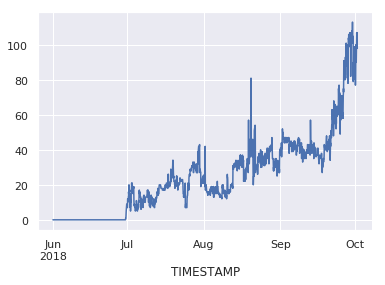

In [156]:
data2['active_deal_number'].plot()

In [157]:
df_connor = df[df.consumer_ID == "0x417c92FbD944b125A578848DE44a4FD9132E0911"]

In [158]:
df_connor.head()

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20,00:11:19,11.316667,0.188611,0.055199
6,"{""deal"":{""id"":""6035""","""benchmarks"":{""values"":[103",1300,4,512000000,67108864,1000001,1000000,1,6368002048,...,0.019530,21.959,6035,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-09-05 09:32:32,2018-09-05 10:21:02,00:48:30,48.500000,0.808333,0.015787
9,"{""deal"":{""id"":""3604""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0.133979,159.800,3604,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 11:30:58,2018-08-15 14:12:19,02:41:21,161.350000,2.689167,0.360292
15,"{""deal"":{""id"":""2334""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000002,1000000,9,3163553792,...,0.290453,199.602,2334,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-27 09:49:28,2018-07-27 09:50:07,00:00:39,0.650000,0.010833,0.003147
16,"{""deal"":{""id"":""5999""","""benchmarks"":{""values"":[108",998,2,512000000,67108864,1000000,1000000,2,8518770688,...,0.054259,57.753,5999,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,2018-09-05 04:57:47,2018-09-05 10:23:02,05:25:15,325.250000,5.420833,0.294128


In [159]:
def calclate_connor_deals(time_stamp):
    return len(df_connor[(df_connor.starttime<time_stamp) & (df_connor.endtime>time_stamp)])

In [160]:
data['connor_deal_number'] = data['TIMESTAMP'].apply(calclate_connor_deals)

In [161]:
data2 = data.set_index('TIMESTAMP')

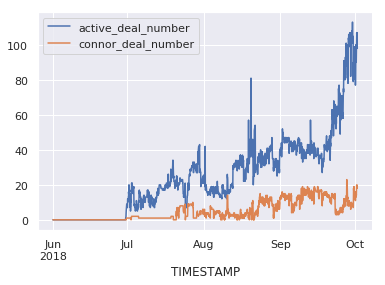

In [162]:
data2[['active_deal_number','connor_deal_number']].plot()

# CPU connor

0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7

In [163]:
df_CPUconnor = df[df.consumer_ID == "0x4C5BAf6Fa57AA4b37DB3dAcd5eAf5A220Db638c7"]

In [164]:
def calclate_CPUconnor_deals(time_stamp):
    return len(df_CPUconnor[(df_CPUconnor.starttime<time_stamp) & (df_CPUconnor.endtime>time_stamp)])

In [165]:
data['CPUconnor_deal_number'] = data['TIMESTAMP'].apply(calclate_CPUconnor_deals)

In [166]:
data2 = data.set_index('TIMESTAMP')

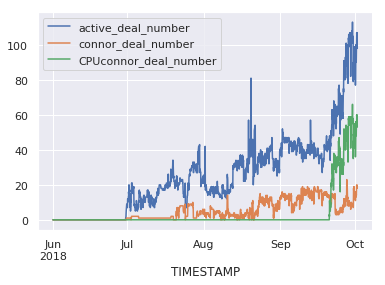

In [167]:
data2[['active_deal_number','connor_deal_number','CPUconnor_deal_number']].plot()

In [168]:
data.head()

,TIMESTAMP,TYPE,active_deal_number,connor_deal_number,CPUconnor_deal_number
0,2018-06-01 00:00:00,2,0,0,0
1,2018-06-01 01:00:00,6,0,0,0
2,2018-06-01 02:00:00,7,0,0,0
3,2018-06-01 03:00:00,1,0,0,0
4,2018-06-01 04:00:00,9,0,0,0


In [169]:
data.tail()

,TIMESTAMP,TYPE,active_deal_number,connor_deal_number,CPUconnor_deal_number
2949,2018-10-01 21:00:00,2,107,20,60
2950,2018-10-01 22:00:00,8,98,20,54
2951,2018-10-01 23:00:00,4,102,19,56
2952,2018-10-02 00:00:00,8,98,18,53
2953,2018-10-02 01:00:00,4,98,19,53


# calculate failed deal distribution

In [170]:
data.head()

,TIMESTAMP,TYPE,active_deal_number,connor_deal_number,CPUconnor_deal_number
0,2018-06-01 00:00:00,2,0,0,0
1,2018-06-01 01:00:00,6,0,0,0
2,2018-06-01 02:00:00,7,0,0,0
3,2018-06-01 03:00:00,1,0,0,0
4,2018-06-01 04:00:00,9,0,0,0


In [171]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,0.037976,35.642,1178,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-10 22:24:13,2018-07-10 22:26:58,00:02:45,2.750000,0.045833,0.001741
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,0.000000,29.779,1192,0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117,2018-07-10 22:51:19,2018-07-10 23:01:22,00:10:03,10.050000,0.167500,0.000000
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0.100000,79.806,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21,21.350000,0.355833,0.035583
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,0.019923,26.625,1663,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-17 17:31:07,2018-07-17 17:31:37,00:00:30,0.500000,0.008333,0.000166
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20,00:11:19,11.316667,0.188611,0.055199


In [172]:
df_failed = df[df.duration_minutes <10]

In [173]:
df_successed = df[df.duration_minutes >10]

In [174]:
def calclate_failed_deals(time_stamp):
    return len(df_failed[(df_failed.starttime<time_stamp) & (df_failed.endtime>time_stamp)])

In [175]:
def calclate_successed_deals(time_stamp):
    return len(df_successed[(df_successed.starttime<time_stamp) & (df_successed.endtime>time_stamp)])

In [176]:
data['failed_deal_number'] = data['TIMESTAMP'].apply(calclate_failed_deals)

In [177]:
data['successed_deal_number'] = data['TIMESTAMP'].apply(calclate_successed_deals)

In [178]:
data2 = data.set_index('TIMESTAMP')

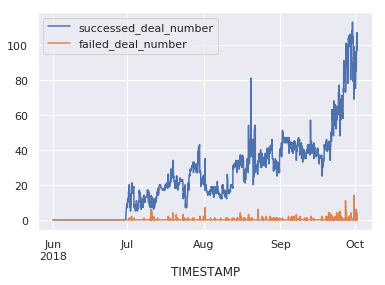

In [179]:
data2[['successed_deal_number','failed_deal_number']].plot()

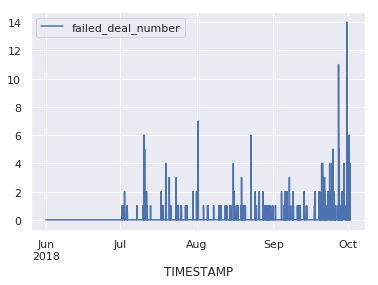

In [180]:
data2[['failed_deal_number']].plot()

# weekley need to move to the last

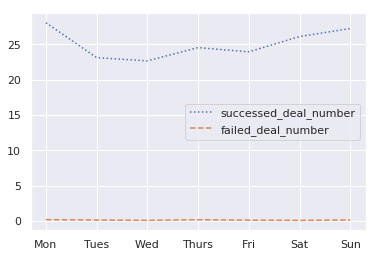

In [185]:
by_weekday = data2.groupby(data2.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday[['successed_deal_number','failed_deal_number']].plot(style=[':', '--', '-']);

In [188]:
by_weekday.columns.values

array(['TYPE', 'active_deal_number', 'connor_deal_number',
       'CPUconnor_deal_number', 'failed_deal_number',
       'successed_deal_number'], dtype=object)

In [189]:
by_weekday[['active_deal_number', 'connor_deal_number',
       'CPUconnor_deal_number', 'failed_deal_number',
       'successed_deal_number']]

,active_deal_number,connor_deal_number,CPUconnor_deal_number,failed_deal_number,successed_deal_number
Mon,28.277778,5.708333,5.011574,0.210648,28.067130
Tues,23.287805,4.775610,2.097561,0.156098,23.131707
Wed,22.779412,4.426471,2.188725,0.105392,22.674020
Thurs,24.747549,5.137255,2.882353,0.198529,24.549020
Fri,24.081019,5.090278,3.946759,0.134259,23.946759
Sat,26.222222,5.361111,4.761574,0.101852,26.118056
Sun,27.407407,5.347222,4.763889,0.159722,27.247685


# previously coded part

In [190]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])].groupby('master_ID').describe()

Ethash                          \
                                            count        mean         std   
master_ID                                                                   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    1.0    0.000000         NaN   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4    1.0  172.350000         NaN   
0x25158E6f8dD683d222E3785BA2294A319489084E    1.0   22.179000         NaN   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f    1.0   12.220000         NaN   
0x3C63D359D86E6165a2eBe911caA822d90e85432C    1.0    0.000000         NaN   
0x416Af57F633e292b25976573a460d7C3200feD34    3.0  159.752333   26.604168   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b    1.0   30.105000         NaN   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA    3.0   26.442000   30.296063   
0x517648Ec2E592969Ec344642034F079c52AfD025    2.0   29.558500    4.094855   
0x61a2bB7A14177820F852afb95E3625b6A370079C    2.0    0.000000    0.000000   
0x6F6B9a47668D96b3758D79c67c30A290934a759F    1.0   19.778000         NaN   
0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce    1.0    0.000000         NaN   
0x8125721C2413d99a33E351e1F6Bb4e56b6b633FD    2.0    0.000005    0.000007   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6    1.0    0.000000         NaN   
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01    1.0   21.959000         NaN   
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE    1.0    0.000000         NaN   
0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD    1.0  165.157000         NaN   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F    1.0  129.860000         NaN   
0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32    1.0    0.000000         NaN   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F    1.0   64.894000         NaN   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d    2.0   21.711000    0.005657   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82    1.0   85.636000         NaN   
0xedB7Ae4B946Cf249349974A02e354B5FBC577798    2.0  109.769500  155.237516   
0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3    6.0    0.000000    0.000000   

                                                                             \
                                                min         25%         50%   
master_ID                                                                     
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    0.000    0.000000    0.000000   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4  172.350  172.350000  172.350000   
0x25158E6f8dD683d222E3785BA2294A319489084E   22.179   22.179000   22.179000   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f   12.220   12.220000   12.220000   
0x3C63D359D86E6165a2eBe911caA822d90e85432C    0.000    0.000000    0.000000   
0x416Af57F633e292b25976573a460d7C3200feD34  133.203  146.423000  159.643000   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b   30.105   30.105000   30.105000   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA    0.000    9.913500   19.827000   
0x517648Ec2E592969Ec344642034F079c52AfD025   26.663   28.110750   29.558500   
0x61a2bB7A14177820F852afb95E3625b6A370079C    0.000    0.000000    0.000000   
0x6F6B9a47668D96b3758D79c67c30A290934a759F   19.778   19.778000   19.778000   
0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce    0.000    0.000000    0.000000   
0x8125721C2413d99a33E351e1F6Bb4e56b6b633FD    0.000    0.000003    0.000005   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6    0.000    0.000000    0.000000   
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01   21.959   21.959000   21.959000   
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE    0.000    0.000000    0.000000   
0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD  165.157  165.157000  165.157000   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F  129.860  129.860000  129.860000   
0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32    0.000    0.000000    0.000000   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F   64.894   64.894000   64.894000   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d   21.707   21.709000   21.711000   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82   85.636   85.636000   8

In [191]:
len(df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])].groupby('master_ID').describe())

24

In [192]:
def calclate_unique_supplier(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)].groupby('master_ID').describe())

In [193]:
calclate_unique_supplier(data['TIMESTAMP'][2000])

24

In [194]:
data['supplier_number'] = data['TIMESTAMP'].apply(calclate_unique_supplier)

In [195]:
data2 = data.set_index('TIMESTAMP')

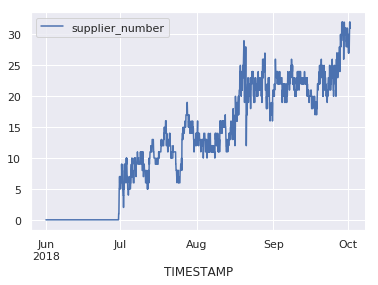

In [196]:
data2[['supplier_number']].plot()

In [197]:
def calclate_unique_consumer(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)].groupby('consumer_ID').describe())

In [198]:
data['consumerr_number'] = data['TIMESTAMP'].apply(calclate_unique_consumer)

In [199]:
data['consumer_number']= data['consumerr_number']

In [200]:
data2 = data.set_index('TIMESTAMP')

In [201]:
data2.head()

,TYPE,active_deal_number,connor_deal_number,CPUconnor_deal_number,failed_deal_number,successed_deal_number,supplier_number,consumerr_number,consumer_number
TIMESTAMP,,,,,,,,,
2018-06-01 00:00:00,2,0,0,0,0,0,0,0,0
2018-06-01 01:00:00,6,0,0,0,0,0,0,0,0
2018-06-01 02:00:00,7,0,0,0,0,0,0,0,0
2018-06-01 03:00:00,1,0,0,0,0,0,0,0,0
2018-06-01 04:00:00,9,0,0,0,0,0,0,0,0


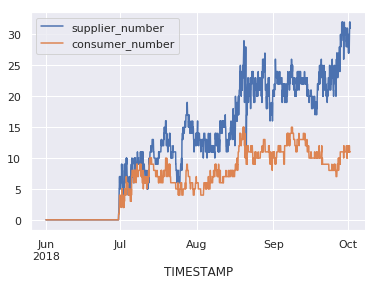

In [202]:
data2[['supplier_number','consumer_number']].plot()

In [203]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['Ethash'].sum()

1604.7990100000002

In [204]:
def calclate_Ethash(time_stamp):
    return df[(df.starttime<time_stamp) & (df.endtime>time_stamp)]['Ethash'].sum()

In [205]:
data['total_Ethash'] = data['TIMESTAMP'].apply(calclate_Ethash)

In [206]:
data2 = data.set_index('TIMESTAMP')

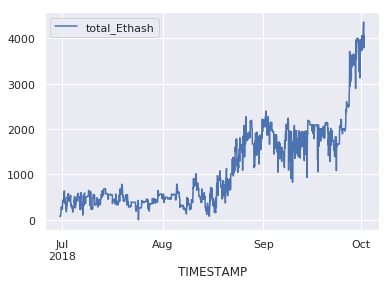

In [207]:
data2[['total_Ethash']].plot()

In [208]:
data['Ethash/deal'] = data['total_Ethash']/data['active_deal_number']

In [209]:
data2 = data.set_index('TIMESTAMP')

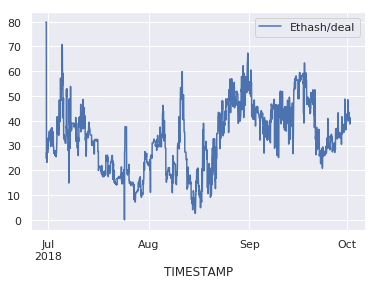

In [210]:
data2[['Ethash/deal']].plot()

In [211]:
data['Ethash/supplier'] = data['total_Ethash']/data['supplier_number']

In [212]:
data2 = data.set_index('TIMESTAMP')

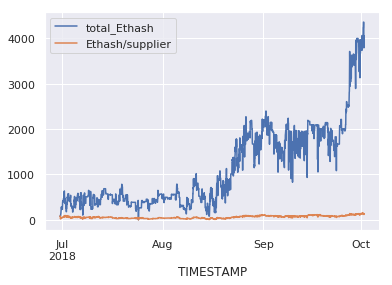

In [213]:
data2[['total_Ethash','Ethash/supplier']].plot()

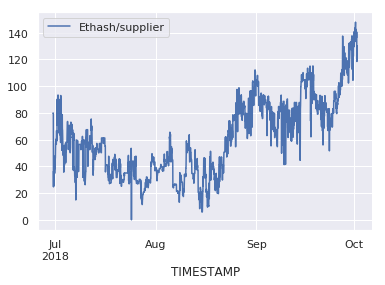

In [214]:
data2[['Ethash/supplier']].plot()

In [215]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['duration_minutes'].mean()/60

437.69587633111843

In [216]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['duration_minutes']

1963       3549.416667
3075       4146.983333
3085       3919.650000
3271       5113.066667
3850       3919.300000
3895      63861.016667
4114       3289.000000
4481      13658.600000
4516       1198.850000
4573      10051.166667
4586     117147.492186
4647       5117.666667
4696      10087.216667
4820       2983.166667
4840        659.500000
4962         26.300000
5017        134.150000
5036        134.100000
5086        181.150000
5120      14400.150000
5164       2422.900000
5300       4737.766667
5579       2487.166667
5599       4779.266667
5688       3565.916667
5782       8656.033333
5926       4694.116667
6085       9974.900000
7122      15067.950000
7143      61422.639394
8227     117138.261510
8260      40294.450000
11262     66192.683333
11377     70183.566667
12352     70171.066667
12994     70151.666667
13074     70523.916667
13225    111904.388279
Name: duration_minutes, dtype: float64

In [217]:
def mean_duration(timestamp):
    return df[(df.starttime<timestamp) & (df.endtime>timestamp)]['duration_minutes'].mean()/60
    

In [218]:
mean_duration(data['TIMESTAMP'][2000])

437.69587633111843

In [219]:
data['mean_duration_hour']=data['TIMESTAMP'].apply(mean_duration)

In [220]:
data2 = data.set_index('TIMESTAMP')

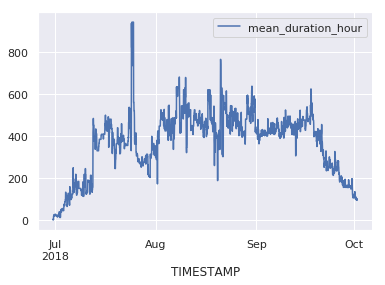

In [221]:
data2[['mean_duration_hour']].plot()

In [222]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['duration_minutes']

1963       3549.416667
3075       4146.983333
3085       3919.650000
3271       5113.066667
3850       3919.300000
3895      63861.016667
4114       3289.000000
4481      13658.600000
4516       1198.850000
4573      10051.166667
4586     117147.492186
4647       5117.666667
4696      10087.216667
4820       2983.166667
4840        659.500000
4962         26.300000
5017        134.150000
5036        134.100000
5086        181.150000
5120      14400.150000
5164       2422.900000
5300       4737.766667
5579       2487.166667
5599       4779.266667
5688       3565.916667
5782       8656.033333
5926       4694.116667
6085       9974.900000
7122      15067.950000
7143      61422.639394
8227     117138.261510
8260      40294.450000
11262     66192.683333
11377     70183.566667
12352     70171.066667
12994     70151.666667
13074     70523.916667
13225    111904.388279
Name: duration_minutes, dtype: float64

# Connor time stamp and profitability

In [223]:
df_connor.head()

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20,00:11:19,11.316667,0.188611,0.055199
6,"{""deal"":{""id"":""6035""","""benchmarks"":{""values"":[103",1300,4,512000000,67108864,1000001,1000000,1,6368002048,...,0.019530,21.959,6035,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-09-05 09:32:32,2018-09-05 10:21:02,00:48:30,48.500000,0.808333,0.015787
9,"{""deal"":{""id"":""3604""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0.133979,159.800,3604,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 11:30:58,2018-08-15 14:12:19,02:41:21,161.350000,2.689167,0.360292
15,"{""deal"":{""id"":""2334""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000002,1000000,9,3163553792,...,0.290453,199.602,2334,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-27 09:49:28,2018-07-27 09:50:07,00:00:39,0.650000,0.010833,0.003147
16,"{""deal"":{""id"":""5999""","""benchmarks"":{""values"":[108",998,2,512000000,67108864,1000000,1000000,2,8518770688,...,0.054259,57.753,5999,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,2018-09-05 04:57:47,2018-09-05 10:23:02,05:25:15,325.250000,5.420833,0.294128


In [224]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
1963,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,0.028091,32.454,4836,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:13,2018-08-25 08:24:38,2 days 11:09:25,3549.416667,59.156944,1.661771
4820,"{""deal"":{""id"":""4881""","""benchmarks"":{""values"":[104",1062,4,512000000,67108864,1000000,1000000,1,8512339968,...,0.025210,30.105,4881,0x424129085f9b7F0Cc07c47D077206d835a2A7B2b,2018-08-23 06:39:40,2018-08-25 08:22:50,2 days 01:43:10,2983.166667,49.719444,1.253438
4840,"{""deal"":{""id"":""4875""","""benchmarks"":{""values"":[108",1094,2,512000000,67108864,1000000,1000000,6,8507097088,...,0.150264,172.350,4875,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2018-08-23 04:07:49,2018-08-23 15:07:19,0 days 10:59:30,659.500000,10.991667,1.651651
4962,"{""deal"":{""id"":""4883""","""benchmarks"":{""values"":[103",1288,2,512000000,67108864,1000000,1000000,6,8152825856,...,0.147143,165.157,4883,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,2018-08-23 07:58:52,2018-08-23 08:25:10,0 days 00:26:18,26.300000,0.438333,0.064498
5017,"{""deal"":{""id"":""4878""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,1,6373244928,...,0.017390,19.827,4878,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 06:28:28,2018-08-23 08:42:37,0 days 02:14:09,134.150000,2.235833,0.038880
5036,"{""deal"":{""id"":""4879""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,3,6372196352,...,0.050831,59.499,4879,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 06:28:52,2018-08-23 08:42:58,0 days 02:14:06,134.100000,2.235000,0.113608
5300,"{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,0.023186,26.663,4837,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:43,2018-08-26 04:13:29,3 days 06:57:46,4737.766667,78.962778,1.830841
5579,"{""deal"":{""id"":""4874""","""benchmarks"":{""values"":[104",1301,2,512000000,67108864,1000000,1000000,5,8513388544,...,0.115931,133.203,4874,0x416Af57F633e292b25976573a460d7C3200feD34,2018-08-23 04:05:13,2018-08-24 21:32:23,1 days 17:27:10,2487.166667,41.452778,4.805646
5599,"{""deal"":{""id"":""4830""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,0.018727,21.715,4830,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,2018-08-22 21:04:13,2018-08-26 04:43:29,3 days 07:39:16,4779.266667,79.654444,1.491709
5688,"{""deal"":{""id"":""4818""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,0.018727,21.707,4818,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,2018-08-22 20:57:13,2018-08-25 08:23:08,2 days 11:25:55,3565.916667,59.431944,1.112997


In [225]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['Ethash'].sum()

702.45800000000008

In [226]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['price_USD/h'].sum()

0.61288928999999992

In [227]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['price_USD/h'].sum()/df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['Ethash'].sum()

0.00087249243371133908

In [228]:
def profitability(timestamp):
    ethash = df_connor[(df_connor.starttime<timestamp) & (df_connor.endtime>timestamp)]['Ethash'].sum()
    price = df_connor[(df_connor.starttime<timestamp) & (df_connor.endtime>timestamp)]['price_USD/h'].sum()
    return price/ethash

In [229]:
profitability(data['TIMESTAMP'][2000])

0.00087249243371133908

In [230]:
data['profitability USD/h per Mh/s']=data['TIMESTAMP'].apply(profitability)

In [231]:
data2 = data.set_index('TIMESTAMP')

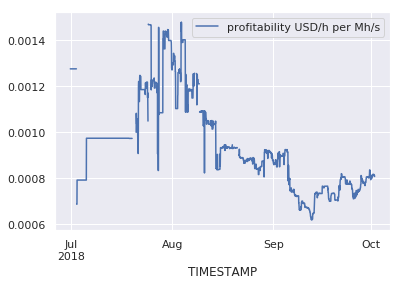

In [232]:
data2[['profitability USD/h per Mh/s']].plot()

In [233]:
data2.iloc[2000]

TYPE                               4.000000
active_deal_number                38.000000
connor_deal_number                11.000000
CPUconnor_deal_number              0.000000
failed_deal_number                 0.000000
successed_deal_number             38.000000
supplier_number                   24.000000
consumerr_number                  12.000000
consumer_number                   12.000000
total_Ethash                    1604.799010
Ethash/deal                       42.231553
Ethash/supplier                   66.866625
mean_duration_hour               437.695876
profitability USD/h per Mh/s       0.000872
Name: 2018-08-23 08:00:00, dtype: float64

In [234]:
def profitability_total(timestamp):
    ethash = df[(df.starttime<timestamp) & (df.endtime>timestamp)]['Ethash'].sum()
    price = df[(df.starttime<timestamp) & (df.endtime>timestamp)]['price_USD/h'].sum()
    return price/ethash

In [235]:
data['total_profitability USD/h per Mh/s']=data['TIMESTAMP'].apply(profitability_total)

In [236]:
data2 = data.set_index('TIMESTAMP')

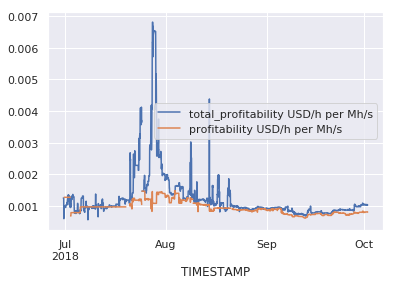

In [237]:
data2[['total_profitability USD/h per Mh/s','profitability USD/h per Mh/s']].plot()

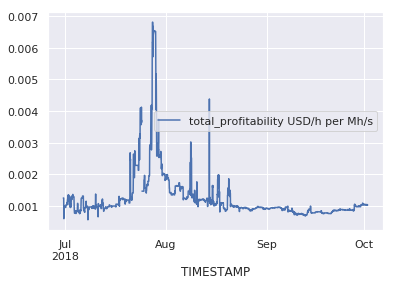

In [238]:
data2[['total_profitability USD/h per Mh/s']].plot()

In [239]:
data.tail()

,TIMESTAMP,TYPE,active_deal_number,connor_deal_number,CPUconnor_deal_number,failed_deal_number,successed_deal_number,supplier_number,consumerr_number,consumer_number,total_Ethash,Ethash/deal,Ethash/supplier,mean_duration_hour,profitability USD/h per Mh/s,total_profitability USD/h per Mh/s
2949,2018-10-01 21:00:00,2,107,20,60,0,107,32,11,11,4356.029,40.710551,136.125906,93.863172,0.000815,0.001024
2950,2018-10-01 22:00:00,8,98,20,54,0,98,32,11,11,3788.906,38.662306,118.403313,100.656199,0.000815,0.001046
2951,2018-10-01 23:00:00,4,102,19,56,4,98,32,11,11,4057.966,39.783980,126.811438,94.750664,0.000808,0.001036
2952,2018-10-02 00:00:00,8,98,18,53,0,98,31,11,11,4031.331,41.136031,130.042935,98.462701,0.000807,0.001036
2953,2018-10-02 01:00:00,4,98,19,53,1,97,31,11,11,4031.331,41.136031,130.042935,98.433154,0.000810,0.001032


# Consumers who left SONM

In [240]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes,duration_hours,total_revenue_USD
0,"{""deals"":[{""deal"":{""id"":""1178""","""benchmarks"":{""values"":[211",1175,2,256000000,67108864,1000000,1000000,2,3165650944,...,0.037976,35.642,1178,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-10 22:24:13,2018-07-10 22:26:58,00:02:45,2.750000,0.045833,0.001741
1,"{""deal"":{""id"":""1192""","""benchmarks"":{""values"":[162",820,3,512000000,512000000,1024000,1024001,1,8503951360,...,0.000000,29.779,1192,0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117,2018-07-10 22:51:19,2018-07-10 23:01:22,00:10:03,10.050000,0.167500,0.000000
2,"{""deal"":{""id"":""1""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0.100000,79.806,1,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 08:53:49,2018-06-30 09:15:10,00:21:21,21.350000,0.355833,0.035583
3,"{""deal"":{""id"":""1663""","""benchmarks"":{""values"":[206",1095,2,256000000,67108864,1000000,1000000,1,8513388544,...,0.019923,26.625,1663,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-17 17:31:07,2018-07-17 17:31:37,00:00:30,0.500000,0.008333,0.000166
4,"{""deal"":{""id"":""2555""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,9,3163553792,...,0.292659,199.600,2555,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-07-30 13:56:01,2018-07-30 14:07:20,00:11:19,11.316667,0.188611,0.055199


In [241]:
df.groupby('consumer_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x04d97A8A4dC6446855f79a55F5caAc571AA207Ec,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000
0x09b5bCe83bAc492EE6B651d8e33A5eF6e5C347c6,2.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,19.474500,10.103849,12.33000,15.90225,19.47450,23.04675,26.61900
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,42.384800,14.110975,12.33000,29.80000,46.57000,53.25900,79.88400
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,46.0,142.839348,100.422815,22.57600,57.77600,139.86900,255.30800,292.67300
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,585.0,59.112952,70.700204,0.00000,0.00000,26.66100,102.67500,240.00900
0x18cAFA3de8a83e7D82583A131Edd3B26A8AFe296,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000
0x1A982Ef08cDe1A8dF684b3e4f0F070f851f80878,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000
0x1a13173445903d59B1567378989590e6b15A16B7,11.0,20.933455,4.189422,15.62300,18.10500,19.96400,24.51350,26.63500


In [242]:
df_consumer = df.groupby('consumer_ID').describe()['Ethash']

In [243]:
df_consumer.to_csv('consumer.csv')

In [244]:
df_consumer = pd.read_csv('consumer.csv')

In [245]:
df_consumer.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max
0,0x04d97A8A4dC6446855f79a55F5caAc571AA207Ec,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000
1,0x09b5bCe83bAc492EE6B651d8e33A5eF6e5C347c6,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,19.474500,10.103849,12.330,15.90225,19.4745,23.04675,26.619
3,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,42.384800,14.110975,12.330,29.80000,46.5700,53.25900,79.884
4,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,46.0,142.839348,100.422815,22.576,57.77600,139.8690,255.30800,292.673


In [246]:
df_consumer['consumer_ID'][0]

'0x04d97A8A4dC6446855f79a55F5caAc571AA207Ec'

In [247]:
df[df.consumer_ID== df_consumer['consumer_ID'][0]]['endtime'].max()

Timestamp('2018-09-13 05:40:20')

In [248]:
df[df.consumer_ID== df_consumer['consumer_ID'][0]]['endtime'].max() < pd.Timestamp(2018, 9, 1)

False

In [249]:
pd.Timestamp(2018, 9, 1, 12)

Timestamp('2018-09-01 12:00:00')

In [250]:
def supplier_left(ID):
    return df[df.consumer_ID == ID]['endtime'].max() < pd.Timestamp(2018, 9, 1)

In [251]:
df_consumer['left_before_September'] = df_consumer['consumer_ID'].apply(supplier_left)

In [252]:
df_consumer

,consumer_ID,count,mean,std,min,25%,50%,75%,max,left_before_September
0,0x04d97A8A4dC6446855f79a55F5caAc571AA207Ec,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,False
1,0x09b5bCe83bAc492EE6B651d8e33A5eF6e5C347c6,2.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,False
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,19.474500,10.103849,12.33000,15.90225,19.47450,23.04675,26.61900,True
3,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,42.384800,14.110975,12.33000,29.80000,46.57000,53.25900,79.88400,True
4,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,46.0,142.839348,100.422815,22.57600,57.77600,139.86900,255.30800,292.67300,False
5,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,585.0,59.112952,70.700204,0.00000,0.00000,26.66100,102.67500,240.00900,False
6,0x18cAFA3de8a83e7D82583A131Edd3B26A8AFe296,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,True
7,0x1A982Ef08cDe1A8dF684b3e4f0F070f851f80878,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,True
8,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,20.933455,4.189422,15.62300,18.10500,19.96400,24.51350,26.63500,True
9,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,False


In [253]:
df_consumer[df_consumer.left_before_September]

,consumer_ID,count,mean,std,min,25%,50%,75%,max,left_before_September
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,19.474500,10.103849,12.330,15.90225,19.4745,23.04675,26.619,True
3,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,42.384800,14.110975,12.330,29.80000,46.5700,53.25900,79.884,True
6,0x18cAFA3de8a83e7D82583A131Edd3B26A8AFe296,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,True
7,0x1A982Ef08cDe1A8dF684b3e4f0F070f851f80878,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,True
8,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,20.933455,4.189422,15.623,18.10500,19.9640,24.51350,26.635,True
10,0x22d709876F24Da89933008Cd714A1CB3B29090eE,6.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,True
11,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2.0,172.350000,0.000000,172.350,172.35000,172.3500,172.35000,172.350,True
16,0x384B08b25B4B78eb43969b2500999d1Ac3c82007,30.0,19.463167,43.891490,0.000,0.00000,0.0000,22.57875,172.350,True
18,0x4138Feb376d3a85ebD4E211fa8A7dAd081575494,1.0,53.251000,NaN,53.251,53.25100,53.2510,53.25100,53.251,True
20,0x4567Da76D1c0239c21b33fa9aD767E9188108c0e,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,True


In [254]:
len(df_consumer[df_consumer.left_before_September])

41

In [255]:
df_consumer[df_consumer.left_before_September]['consumer_ID']

2     0x0bF957203A68367c344c7B6b60729Fc8354915ef
3     0x1124fCC307756f4077c5e8E09b948C1CA7123eC9
6     0x18cAFA3de8a83e7D82583A131Edd3B26A8AFe296
7     0x1A982Ef08cDe1A8dF684b3e4f0F070f851f80878
8     0x1a13173445903d59B1567378989590e6b15A16B7
10    0x22d709876F24Da89933008Cd714A1CB3B29090eE
11    0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4
16    0x384B08b25B4B78eb43969b2500999d1Ac3c82007
18    0x4138Feb376d3a85ebD4E211fa8A7dAd081575494
20    0x4567Da76D1c0239c21b33fa9aD767E9188108c0e
21    0x47700c0f8c34a42BA88B35c9E67E5A925c7BF245
26    0x517648Ec2E592969Ec344642034F079c52AfD025
28    0x63dA2009Ff928f99D960F48CBDd76C5a3E8591c4
29    0x65A235FFf4F2c6344642c417cb4cE9fA698A5d2b
30    0x67588f2F50227F200B3dd6bd2Bf23076A27C18Ea
32    0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce
33    0x73208ae757b5a5747d79da4a08ba4FB3012ef0E8
34    0x75CA26f23e0fC696af5Cb135b0ABfD53807691fE
35    0x75f554D5298c25C14De9D4BF12c6C1e19F9DB752
37    0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117
39    0x87d341DF84A6

# Suppliers who left SONM

In [256]:
df.groupby('master_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
master_ID,,,,,,,,
0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,0.000000,0.000000e+00,0.000,0.0000,0.000,0.00000,0.000
0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,30.172775,5.445382e+01,0.000,0.0000,0.000,34.53850,138.209
0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000e+00,48.841,48.8410,48.841,48.84100,48.841
0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000e+00,43.452,43.4520,43.452,43.45200,43.452
0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,0.000000,0.000000e+00,0.000,0.0000,0.000,0.00000,0.000
0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.0000,0.000,0.00000,0.000
0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,107.0,135.329243,8.927152e+01,0.000,57.7760,119.971,200.42700,292.673
0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000e+00,159.800,159.8000,159.800,159.80000,159.800
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,209.0,156.655646,9.173347e+01,0.000,102.7820,205.768,239.88100,240.009


In [257]:
df_master = df.groupby('master_ID').describe()['Ethash']

In [258]:
df_master.to_csv('master.csv')

In [259]:
df_master = pd.read_csv('master.csv')

In [260]:
df_master.head()

,master_ID,count,mean,std,min,25%,50%,75%,max
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,30.172775,54.453819,0.000,0.000,0.000,34.5385,138.209
2,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000,48.841,48.841,48.841,48.8410,48.841
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000,43.452,43.452,43.452,43.4520,43.452
4,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000


In [261]:
def supplier_left(ID):
    return df[df.master_ID == ID]['endtime'].max() < pd.Timestamp(2018, 9, 1)

In [262]:
df_master['left_before_September'] = df_master['master_ID'].apply(supplier_left)

In [263]:
df_master

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,0.000000,0.000000e+00,0.000,0.0000,0.000,0.00000,0.000,False
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,30.172775,5.445382e+01,0.000,0.0000,0.000,34.53850,138.209,False
2,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000e+00,48.841,48.8410,48.841,48.84100,48.841,True
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000e+00,43.452,43.4520,43.452,43.45200,43.452,True
4,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,0.000000,0.000000e+00,0.000,0.0000,0.000,0.00000,0.000,False
5,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.000,0.0000,0.000,0.00000,0.000,True
6,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,107.0,135.329243,8.927152e+01,0.000,57.7760,119.971,200.42700,292.673,False
7,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000e+00,159.800,159.8000,159.800,159.80000,159.800,True
8,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,209.0,156.655646,9.173347e+01,0.000,102.7820,205.768,239.88100,240.009,False
9,0x18C3752760a58F5eE89999379768be647e34d78E,8.0,11.092500,1.530910e+01,0.000,0.0000,0.000,29.58000,29.580,False


In [264]:
df_master[df_master.left_before_September]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September
2,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000e+00,48.84100,48.84100,48.84100,48.84100,48.84100,True
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000e+00,43.45200,43.45200,43.45200,43.45200,43.45200,True
5,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,True
7,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000e+00,159.80000,159.80000,159.80000,159.80000,159.80000,True
10,0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,16.082442,2.222325e-01,15.27100,16.16100,16.16100,16.16100,16.16100,True
15,0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1,19.0,13.253000,1.825033e-15,13.25300,13.25300,13.25300,13.25300,13.25300,True
16,0x22E00835bD4b84456Ab3aA5E61a7FF07AB57b4A8,1.0,24.722000,NaN,24.72200,24.72200,24.72200,24.72200,24.72200,True
17,0x22d709876F24Da89933008Cd714A1CB3B29090eE,28.0,0.000000,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,True
18,0x24E192b02d33501f225580d6B19A8d97C5190D45,41.0,17.353463,1.584721e+01,0.00000,0.00000,31.80400,31.80400,31.80400,True
19,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,67.0,133.448657,4.918008e+01,27.11200,86.17500,172.35000,172.35000,176.90000,True


In [265]:
def supplier_joins(ID):
    return df[df.master_ID == ID]['starttime'].min() > pd.Timestamp(2018, 9, 1)

In [266]:
df_master['joined_after_September'] = df_master['master_ID'].apply(supplier_joins)

In [267]:
df_master[df_master.joined_after_September]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,False,True
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,30.172775,54.453819,0.000,0.00000,0.0000,34.53850,138.209,False,True
4,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,False,True
6,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,107.0,135.329243,89.271519,0.000,57.77600,119.9710,200.42700,292.673,False,True
9,0x18C3752760a58F5eE89999379768be647e34d78E,8.0,11.092500,15.309104,0.000,0.00000,0.0000,29.58000,29.580,False,True
11,0x1D6e3DB16F8011dE03E360DafAEe8De99dFFf45E,2.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,False,True
22,0x2546FbBa71dec4738D134df15e178d63E14a4238,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,False,True
29,0x3289629614De674a4d8602368C6883a9d21D55F4,1.0,0.000000,NaN,0.000,0.00000,0.0000,0.00000,0.000,False,True
30,0x328A9D5E7eBf221712fcDFe1eC9Fb9D5501f1B99,9.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000,False,True
31,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,28.0,90.676286,39.625478,0.000,64.99200,76.7310,124.66725,141.723,False,True


In [268]:
df_master['total_Ethash']= df_master['mean']*df_master['count']

In [269]:
df_master[df_master.joined_after_September][['master_ID','count','total_Ethash']].sort_values('total_Ethash', ascending = False)

,master_ID,count,total_Ethash
6,0x1270C99f089Cbf8bF82b926579dE10e05F93d2fb,107.0,14480.229
83,0x904720c59EAA497dD6ed04ea46E15a4C76C99f63,91.0,4932.291
31,0x35f286b2472A99Eb011ff349b2b33f6f497Ca693,28.0,2538.936
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,2142.267
131,0xb58754AC9839d9cF5D4920E440a61988BB00B4c5,223.0,1918.146
111,0xD797292d9983a2327CCDe642FEcD411f85cCBbCa,6.0,1475.334
87,0x94CE08B2018Ede760757eb2892591e9147033040,150.0,1154.480
128,0xb08773F2De0f987178E5aeF09eB0B36b8E7A81C0,17.0,528.685
89,0x981Df5AfBd6dd7c721830Db04B4F5748f23ad488,66.0,450.942
72,0x7a37B02bBbeCdeB297dDbb62593A1e0e08e4147d,59.0,327.357


In [270]:
def early_adopters(ID):
    return df[df.master_ID == ID]['starttime'].max() < pd.Timestamp(2018, 7, 8)

In [271]:
df_master['joined_before_midJuly'] = df_master['master_ID'].apply(early_adopters)

In [272]:
df_master.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_Ethash,joined_before_midJuly
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000,False,True,0.000,False
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,30.172775,54.453819,0.000,0.000,0.000,34.5385,138.209,False,True,2142.267,False
2,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000,48.841,48.841,48.841,48.8410,48.841,True,False,97.682,False
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000,43.452,43.452,43.452,43.4520,43.452,True,False,86.904,False
4,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000,False,True,0.000,False


In [273]:
df_master[df_master.joined_before_midJuly][['master_ID','count','total_Ethash','left_before_September']].sort_values('total_Ethash', ascending = False)

,master_ID,count,total_Ethash,left_before_September
67,0x707ACE0EDF8A3451DB339ae7E66a180a4C5D5cB7,118.0,4034.730,True
151,0xf5291bFDAA9324c42BEf942eCfC971EB95D56b33,28.0,1130.947,True
109,0xC4Ce0CCc35c0c1D1767DC4424C3eeD537b7CC62f,23.0,1111.821,True
54,0x61721F7695a3421FDf15b984f76EF4b6cD921EB4,24.0,879.838,True
150,0xf38487Ef55787A7921086E66C908ac000f01DbE2,21.0,405.447,True
108,0xC3842f9ad5d0a9Fbc9877Aa6Df53521aF1Ab4696,12.0,384.127,True
88,0x958e52955dB5966a80a6f4A9ab98c74d121CF753,18.0,221.956,True
44,0x4a7c2861127A7E0354B60f39EB7F478A1d1222bd,6.0,168.324,True
101,0xA6c5F4d12332A341F0253C9fC5ECf028719848fc,7.0,146.440,True
130,0xb3A8866183ca88ED3c233337C4f85045a2aD7d1F,1.0,27.459,True


In [274]:
df_master.head()

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_Ethash,joined_before_midJuly
0,0x012756e1f9BB41128BCD653Ec77b202De309D4df,3.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000,False,True,0.000,False
1,0x0158400292660B759E1e0E8CDEe5b62AAf2c58e1,71.0,30.172775,54.453819,0.000,0.000,0.000,34.5385,138.209,False,True,2142.267,False
2,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000,48.841,48.841,48.841,48.8410,48.841,True,False,97.682,False
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000,43.452,43.452,43.452,43.4520,43.452,True,False,86.904,False
4,0x096611B14f9175b40Ea09980E5e7a2ea3fA60DCa,6.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000,False,True,0.000,False


In [275]:
def joined_August(ID):
    if df[df.master_ID == ID]['starttime'].max() < pd.Timestamp(2018, 9, 1):
        if df[df.master_ID == ID]['endtime'].max() >pd.Timestamp(2018, 8, 1):
            return True
        else:
            return False
    else:
        return False
        

In [276]:
df_master['joined_August'] = df_master['master_ID'].apply(joined_August)

In [277]:
df_master[df_master.joined_August]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_Ethash,joined_before_midJuly,joined_August
2,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,48.841000,0.000000e+00,48.841,48.8410,48.841,48.84100,48.841,True,False,97.682,False,True
3,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,43.452000,0.000000e+00,43.452,43.4520,43.452,43.45200,43.452,True,False,86.904,False,True
7,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,159.800000,0.000000e+00,159.800,159.8000,159.800,159.80000,159.800,True,False,7990.000,False,True
10,0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,16.082442,2.222325e-01,15.271,16.1610,16.161,16.16100,16.161,True,False,691.545,False,True
13,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,0.000000,0.000000e+00,0.000,0.0000,0.000,0.00000,0.000,False,False,0.000,False,True
17,0x22d709876F24Da89933008Cd714A1CB3B29090eE,28.0,0.000000,0.000000e+00,0.000,0.0000,0.000,0.00000,0.000,True,False,0.000,False,True
18,0x24E192b02d33501f225580d6B19A8d97C5190D45,41.0,17.353463,1.584721e+01,0.000,0.0000,31.804,31.80400,31.804,True,False,711.492,False,True
19,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,67.0,133.448657,4.918008e+01,27.112,86.1750,172.350,172.35000,176.900,True,False,8941.060,False,True
27,0x2c743F2731c5803A649695930DD09a82Bba2B9c6,4.0,0.000000,0.000000e+00,0.000,0.0000,0.000,0.00000,0.000,True,False,0.000,False,True
34,0x3C63D359D86E6165a2eBe911caA822d90e85432C,1.0,0.000000,NaN,0.000,0.0000,0.000,0.00000,0.000,False,False,0.000,False,True


In [278]:
def joined_July(ID):
    if df[df.master_ID == ID]['starttime'].max() < pd.Timestamp(2018, 8, 1):
        if df[df.master_ID == ID]['endtime'].max() >pd.Timestamp(2018, 7, 1):
            return True
        else:
            return False
    else:
        return False
        

In [279]:
df_master['joined_July'] = df_master['master_ID'].apply(joined_July)

In [280]:
df_master[df_master.joined_July]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_Ethash,joined_before_midJuly,joined_August,joined_July
5,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,True,False,0.00000,True,False,True
15,0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1,19.0,13.253000,1.825033e-15,13.25300,13.25300,13.25300,13.25300,13.25300,True,False,251.80700,False,False,True
26,0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,True,False,0.00000,False,False,True
28,0x2ff5E25E63294728F2D0B10bAA36223E6D98702C,1.0,53.175000,NaN,53.17500,53.17500,53.17500,53.17500,53.17500,True,False,53.17500,False,False,True
39,0x417c92FbD944b125A578848DE44a4FD9132E0911,1.0,0.026610,NaN,0.02661,0.02661,0.02661,0.02661,0.02661,True,False,0.02661,False,False,True
42,0x4AADcF4719a29C2bcC8481eddf848a5F3Cfc4fC1,3.0,8.292667,7.851964e-02,8.20200,8.27000,8.33800,8.33800,8.33800,True,False,24.87800,False,False,True
44,0x4a7c2861127A7E0354B60f39EB7F478A1d1222bd,6.0,28.054000,1.054501e+01,21.25200,21.25425,21.26100,35.89950,42.51900,True,False,168.32400,True,False,True
46,0x4ccba01943Cc51Ba70232C42cBb8bd358fcBe15e,7.0,0.000000,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,True,False,0.00000,False,False,True
54,0x61721F7695a3421FDf15b984f76EF4b6cD921EB4,24.0,36.659917,2.372162e+01,21.29200,21.77100,24.07400,42.57600,106.47600,True,False,879.83800,True,False,True
57,0x63dA2009Ff928f99D960F48CBDd76C5a3E8591c4,3.0,19.441000,0.000000e+00,19.44100,19.44100,19.44100,19.44100,19.44100,True,False,58.32300,False,False,True


In [281]:
len(df_master[df_master.joined_July])

31

In [282]:
df_master[df_master.joined_July][df_master[df_master.joined_July]['left_before_September']]

,master_ID,count,mean,std,min,25%,50%,75%,max,left_before_September,joined_after_September,total_Ethash,joined_before_midJuly,joined_August,joined_July
5,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,True,False,0.00000,True,False,True
15,0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1,19.0,13.253000,1.825033e-15,13.25300,13.25300,13.25300,13.25300,13.25300,True,False,251.80700,False,False,True
26,0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b,1.0,0.000000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,True,False,0.00000,False,False,True
28,0x2ff5E25E63294728F2D0B10bAA36223E6D98702C,1.0,53.175000,NaN,53.17500,53.17500,53.17500,53.17500,53.17500,True,False,53.17500,False,False,True
39,0x417c92FbD944b125A578848DE44a4FD9132E0911,1.0,0.026610,NaN,0.02661,0.02661,0.02661,0.02661,0.02661,True,False,0.02661,False,False,True
42,0x4AADcF4719a29C2bcC8481eddf848a5F3Cfc4fC1,3.0,8.292667,7.851964e-02,8.20200,8.27000,8.33800,8.33800,8.33800,True,False,24.87800,False,False,True
44,0x4a7c2861127A7E0354B60f39EB7F478A1d1222bd,6.0,28.054000,1.054501e+01,21.25200,21.25425,21.26100,35.89950,42.51900,True,False,168.32400,True,False,True
46,0x4ccba01943Cc51Ba70232C42cBb8bd358fcBe15e,7.0,0.000000,0.000000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,True,False,0.00000,False,False,True
54,0x61721F7695a3421FDf15b984f76EF4b6cD921EB4,24.0,36.659917,2.372162e+01,21.29200,21.77100,24.07400,42.57600,106.47600,True,False,879.83800,True,False,True
57,0x63dA2009Ff928f99D960F48CBDd76C5a3E8591c4,3.0,19.441000,0.000000e+00,19.44100,19.44100,19.44100,19.44100,19.44100,True,False,58.32300,False,False,True


In [283]:
len(df_master[df_master.joined_July][df_master[df_master.joined_July]['left_before_September']])

30

In [284]:
df_master[df_master.joined_July]['left_before_September']

5       True
15      True
26      True
28      True
39      True
42      True
44      True
46      True
54      True
57      True
59      True
66      True
67      True
70      True
73      True
85      True
88      True
100     True
101     True
108     True
109     True
116    False
119     True
124     True
135     True
139     True
150     True
151     True
152     True
156     True
158     True
Name: left_before_September, dtype: bool